In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# ### Scikit-Learn ###
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as skmetrics

import analysis_utils as aute

In [2]:
df_conv_row = pd.read_csv("Results/DataConvbyRow.csv", sep=";")

df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv", sep=",")
df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv", sep=",")
df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv", sep=",")
df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv", sep=",")

interest_cuest_cols = [
    'Usuario', 'Question1', 'Question2',
    'Question3', 'Question4', 'Question5', 'Question6', 'Question7',
    'Question8', 'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza', 'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

### Merge conversations with the four personalities

In [3]:
df_conv_pers = df_conv_row[df_conv_row["BotPersonality"] != "Neutral"].reset_index(drop=True)
print("Shape", df_conv_pers.shape)

Shape (76, 46)


In [4]:
df_conv_pers

,SubjectId,ConfigName,BotPersonality,FirstDate,LastDate,ConvTime_s,AboveMaximumTime,NumConv,NumSamples,AllTextClean,...,PersonNumUniqWordsClean,PersonNumUniqWords,PersonOriginalText,PersonNumWords,PersonNumWordsClean,PersonNumQuestions,Mean_PersonTalk,Max_PersonTalk,Min_PersonTalk,Diff_PersonTalk
0,User_01_CB,Happy_Woman_1,Happy,1.668589e+09,1.668589e+09,123.356988,False,5,10,"encant conocerte, nombr mari nombre. hol buen ...",...,20,43,hola buenas yo me llamo Jesús encantado Yo soy...,66,32,0,9.411009,15.750861,6.265236,-3.125580
1,User_01_CB,Relax_Man_2,Relax,1.668589e+09,NaN,182.710761,False,7,15,"hola, nombr pabl nombre. hola, llam jesus gust...",...,23,60,"Hola, yo me llamo Jesús te gusta la playa, qué...",106,49,2,9.390276,15.737232,6.210278,3.124682
2,User_01_CB,Sad_Woman_2,Sad,1.668590e+09,NaN,138.772165,False,8,17,"hola, llam sar tu. hola, sar jesus hac buen di...",...,18,43,"Hola, Sara yo soy Jesús hace un buen día, no?....",70,34,1,7.026681,9.435585,6.209277,0.030921
3,User_01_CB,Angry_Man_1,Angry,1.668590e+09,NaN,122.044762,False,5,11,"nombr jorg llamas. hola, llam jesus. enfad can...",...,23,45,"hola, yo me llamo Jesús. Y no has pensado en c...",65,33,1,8.156119,12.621134,6.251256,-0.008949
4,User_02_CB,Happy_Man_1,Happy,1.668597e+09,NaN,207.373702,False,13,27,"encant conocerte, nombr javi nombre. hol javi ...",...,17,34,hola Javier soy Elena. de aquí de la ciudad. d...,64,35,0,6.967394,9.403758,6.217256,-0.040328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,User_18_CB,Happy_Woman_2,Happy,1.669377e+09,NaN,232.713992,False,13,27,"encant conocerte, nombr mari nombre. hola, mar...",...,20,45,"Hola, mi nombre es clara.. Muchas gracias, soy...",83,46,2,6.234937,6.312784,6.202177,-0.110607
72,User_19_CB,Angry_Woman_2,Angry,1.669384e+09,NaN,202.529334,False,8,17,nombr mart llamas. judith. llam mart 31 anos. ...,...,24,58,"cómo Judith. Ah, bueno, lo siento mucho, pero ...",108,47,0,10.170512,15.704931,6.216352,-0.018945
73,User_19_CB,Happy_Man_1,Happy,1.669385e+09,1.669385e+09,275.761385,True,14,28,"encant conocerte, nombr javi nombre. llam judi...",...,51,103,"yo me llamo Judith. Si soy de Valencia bien, h...",206,94,1,9.615273,15.732973,6.210380,-0.012812
74,User_19_CB,Relax_Woman_1,Relax,1.669385e+09,1.669385e+09,290.592365,True,13,26,"hola, nombr luci nombre. hola, llam judith. ho...",...,54,98,"hola, yo me llamo Judith. Realmente yo vivo en...",183,93,2,8.919964,15.767791,6.209354,-0.002738


In [5]:
df_happy_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Happy"], df_happy, 
                          left_on="SubjectId", right_on="Usuario")
print("Happy merge", df_happy_merge.shape)

df_sad_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Sad"], df_sad, 
                          left_on="SubjectId", right_on="Usuario")
print("Sad merge", df_sad_merge.shape)

df_relax_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Relax"], df_relax, 
                          left_on="SubjectId", right_on="Usuario")
print("Relax merge", df_relax_merge.shape)

df_angry_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Angry"], df_angry, 
                          left_on="SubjectId", right_on="Usuario")
print("Angry merge", df_angry_merge.shape)

Happy merge (18, 79)
Sad merge (18, 79)
Relax merge (18, 79)
Angry merge (18, 79)


In [6]:
df_cp = pd.concat([df_happy_merge, df_sad_merge, df_relax_merge, df_angry_merge]).reset_index(drop=True)

KS P-value 0.006668846028113762 with significance **
ANOVA P-value 0.001445006188867705 with significance **
P-value 0.001445006188867705 with significance **


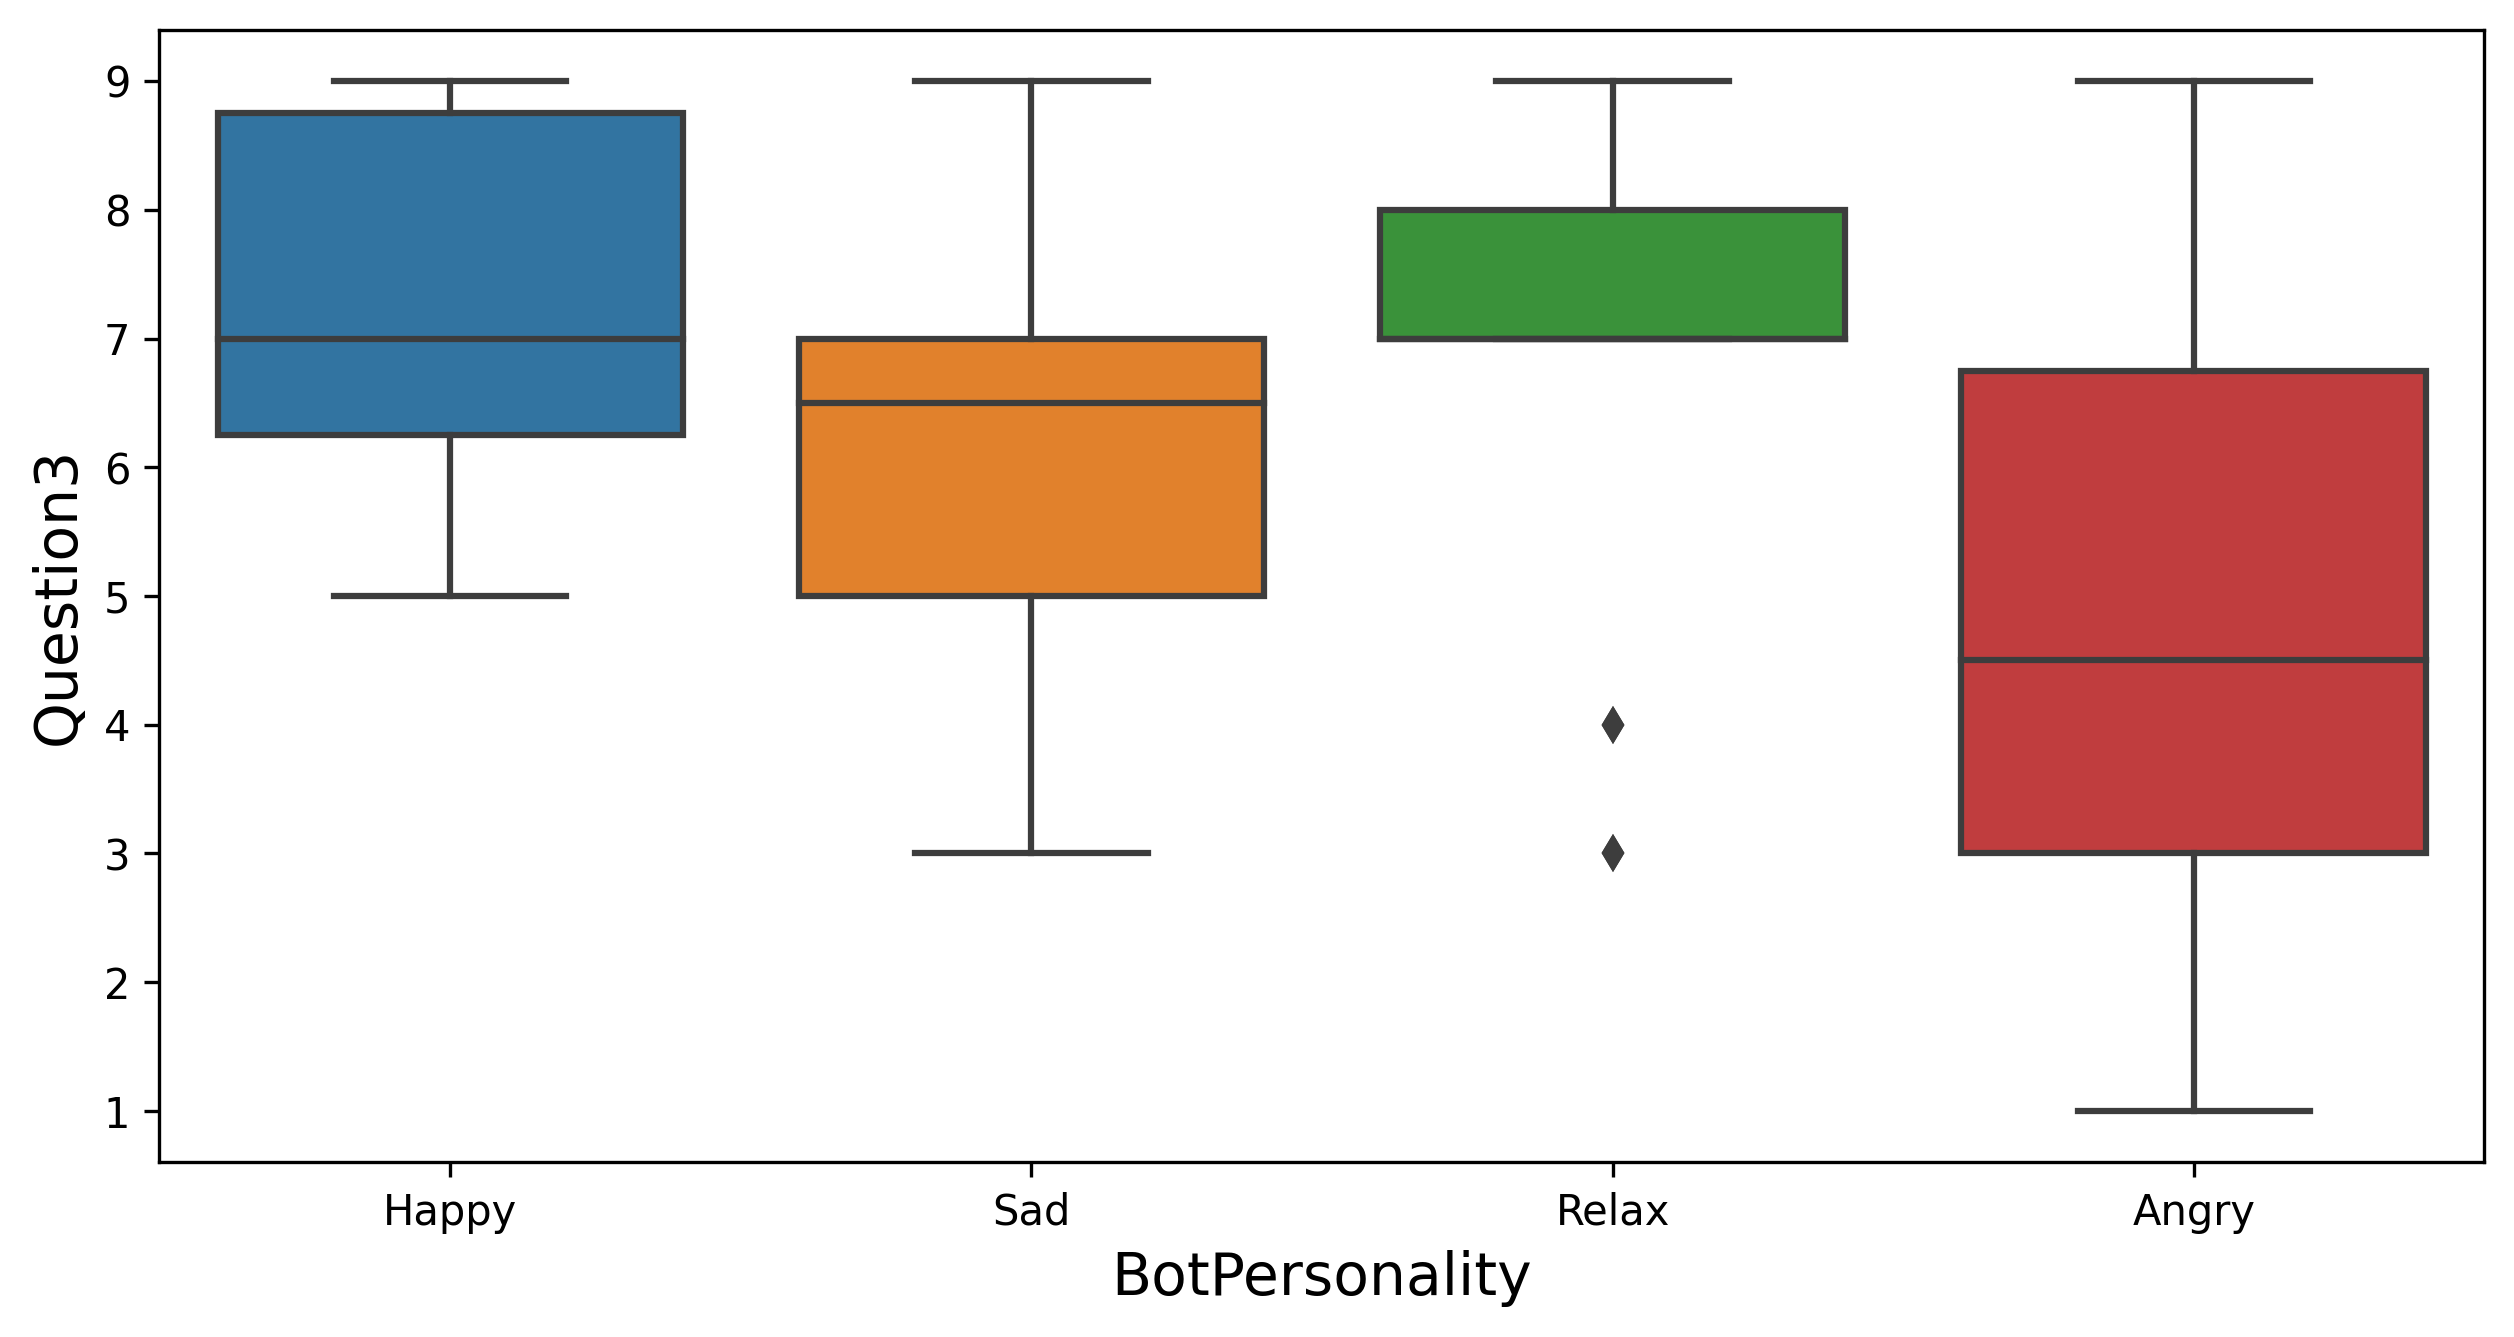

KS P-value 0.05601816779525039 with significance -
ANOVA P-value 0.0022205062352272584 with significance **
P-value 0.0022205062352272584 with significance **


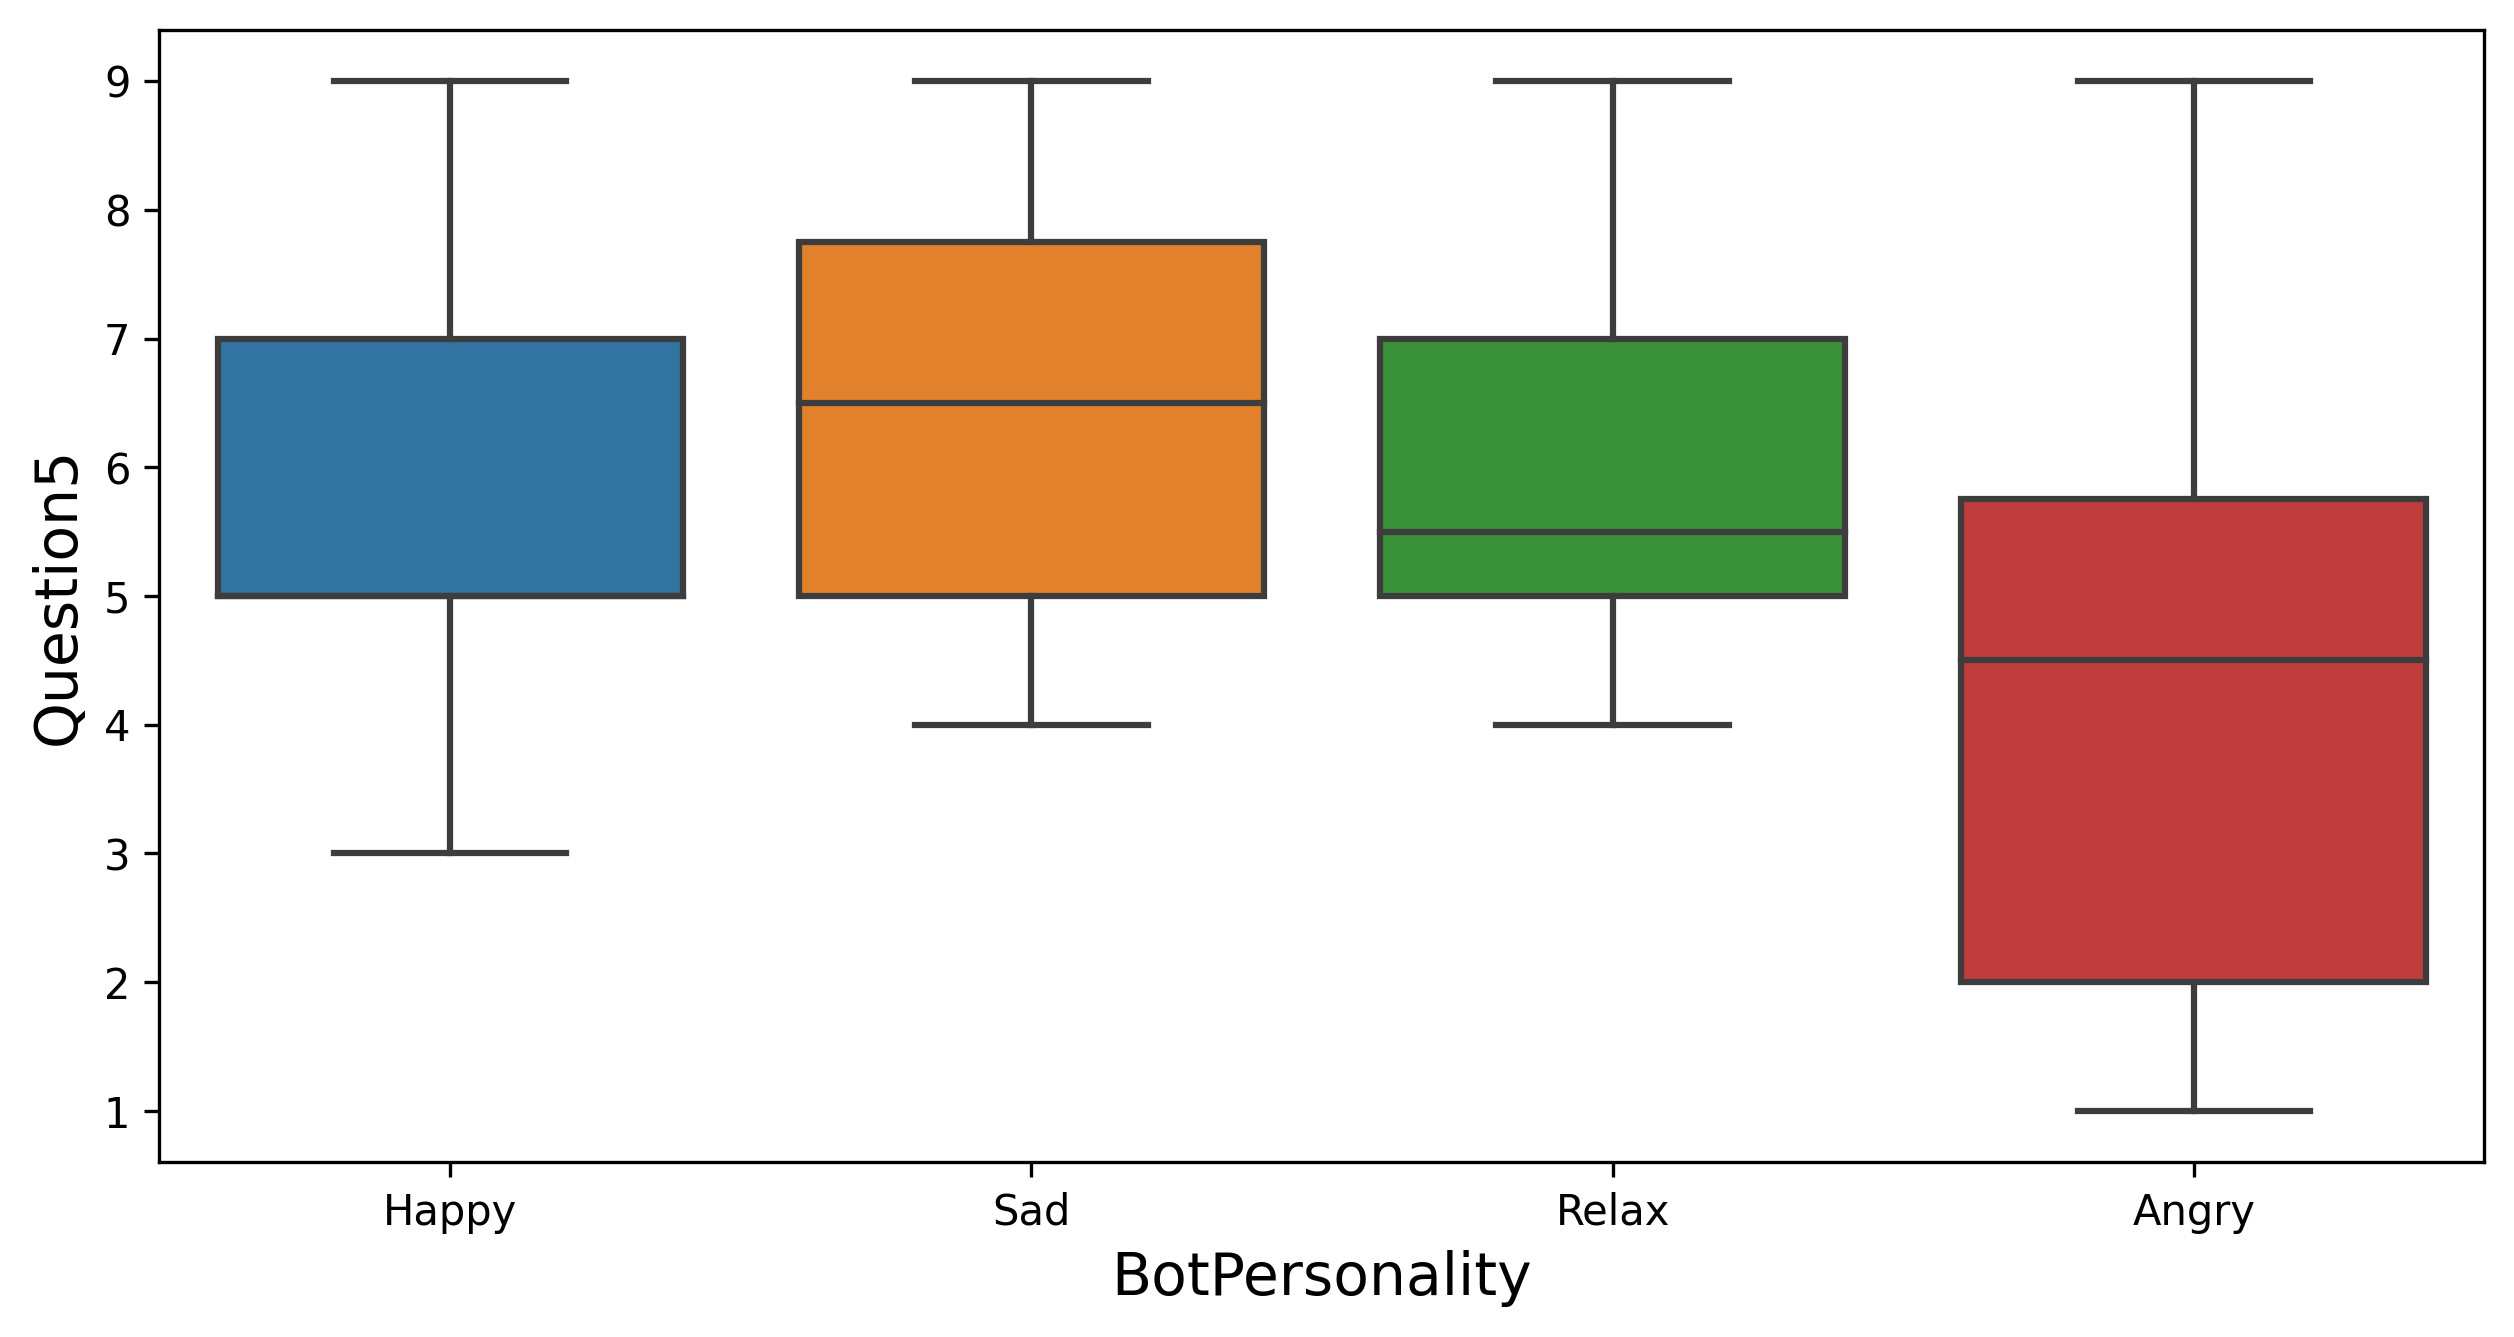

KS P-value 0.020747520755971537 with significance *
ANOVA P-value 0.008963846315501142 with significance **
P-value 0.008963846315501142 with significance **


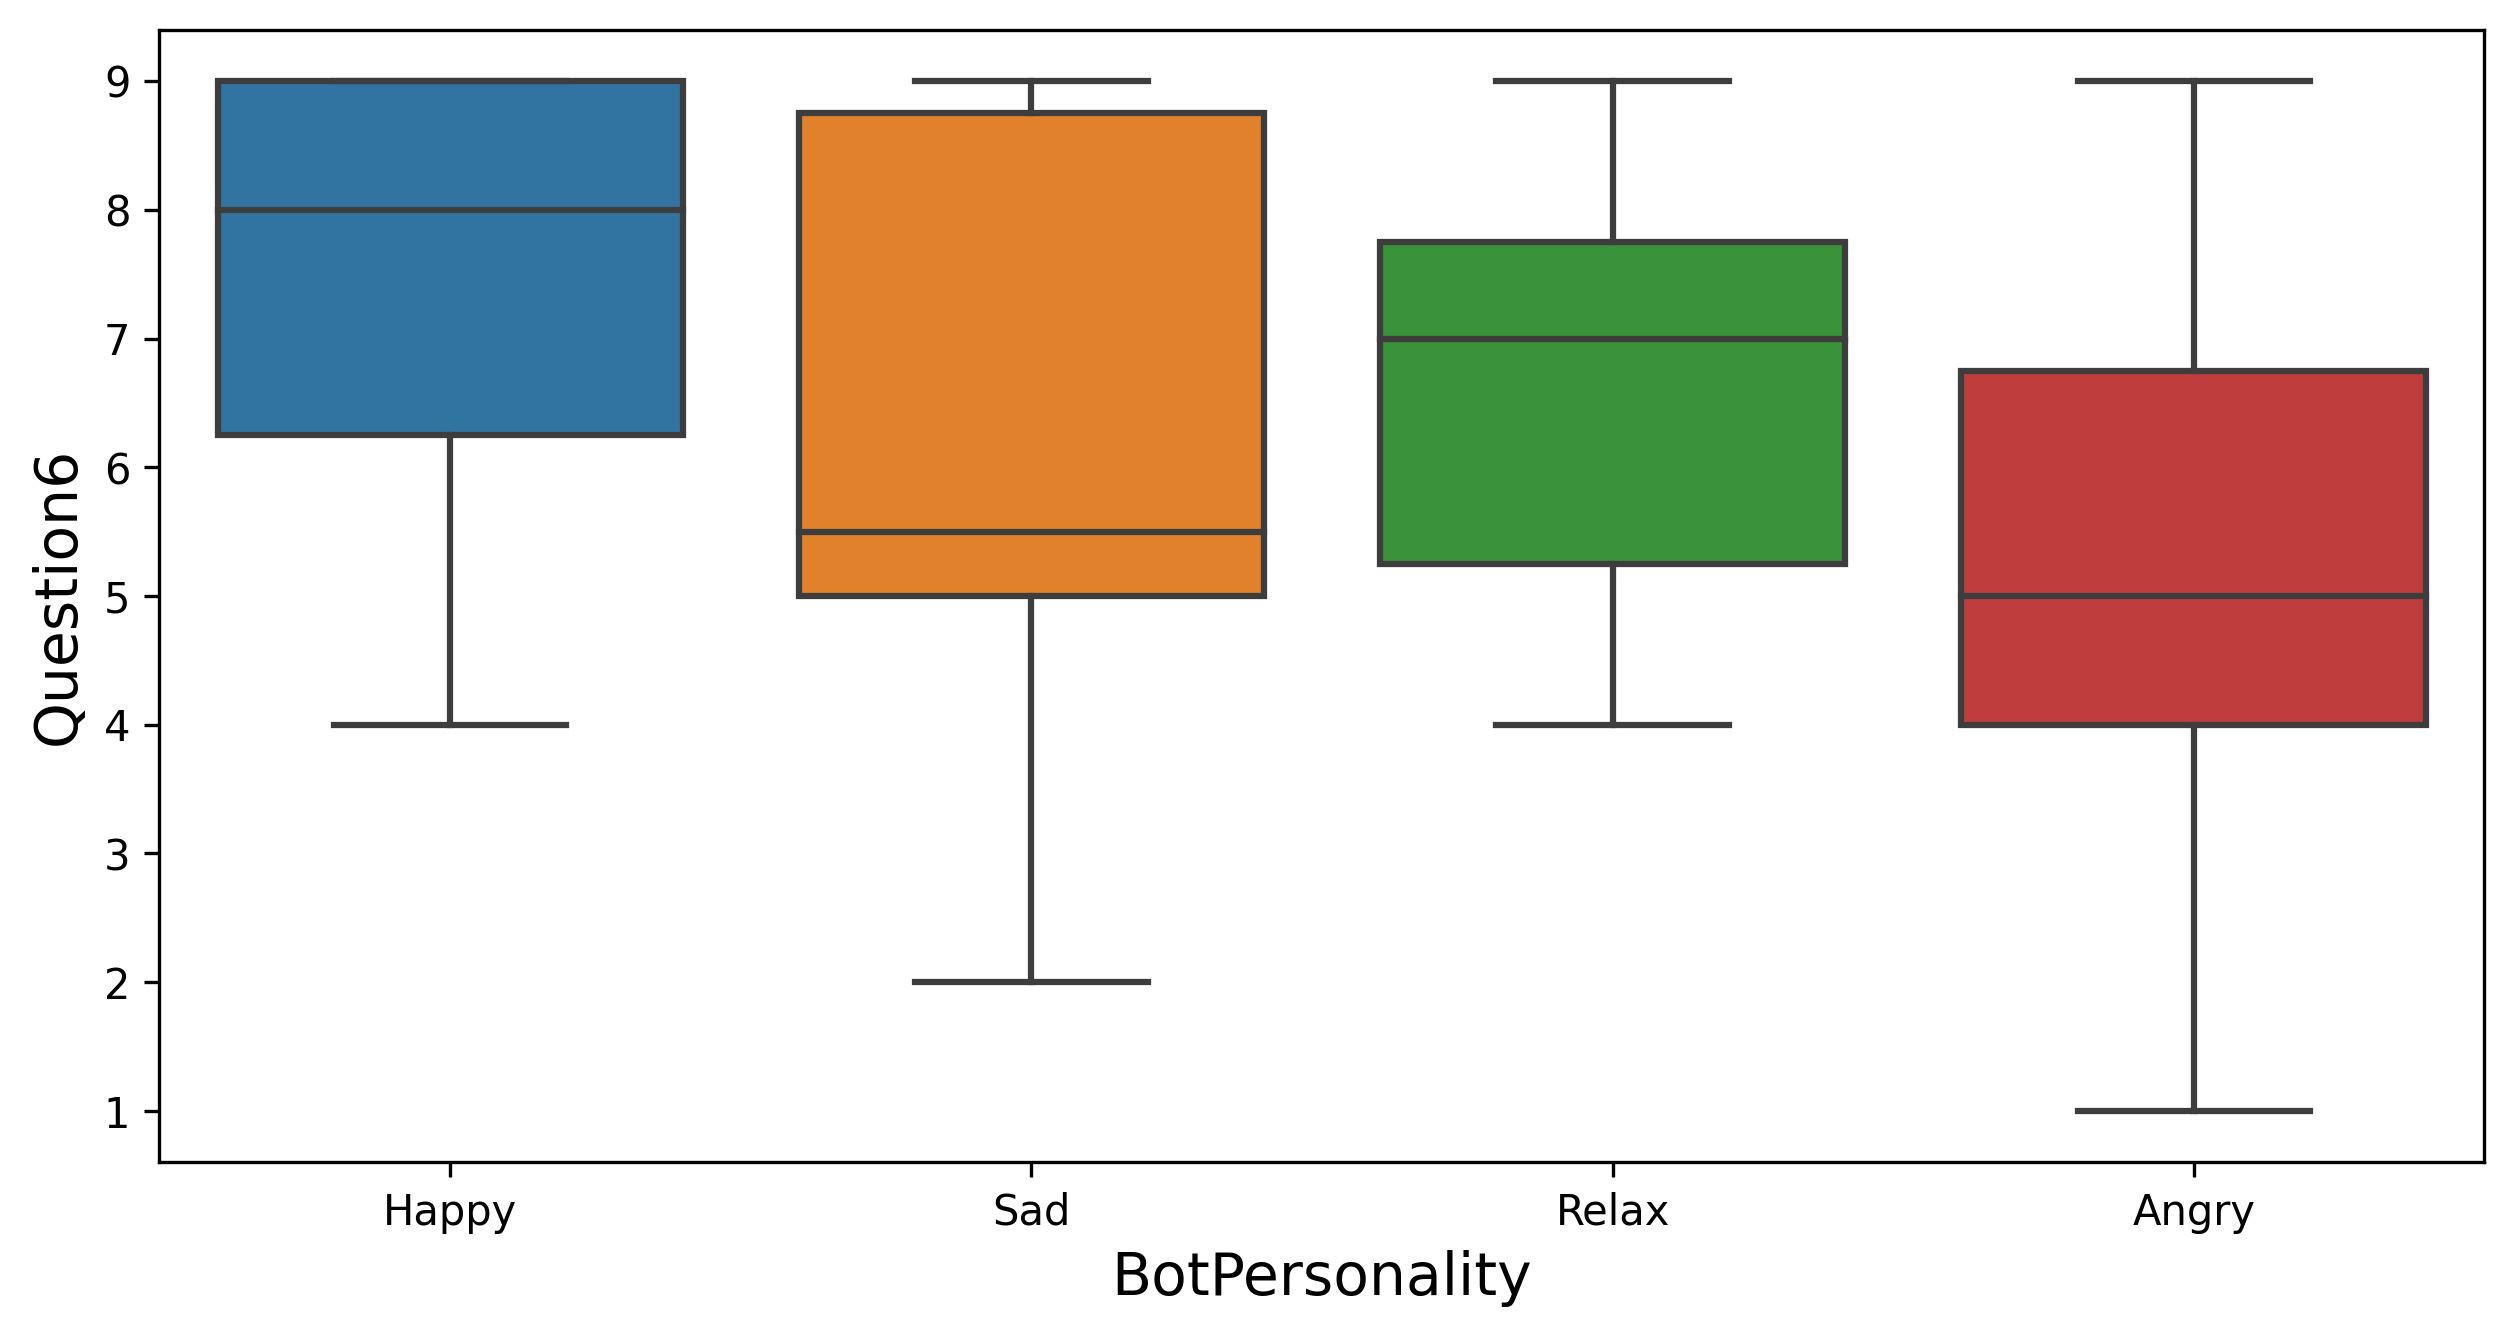

KS P-value 0.2754184632376776 with significance -
ANOVA P-value 0.018638200762441968 with significance *
P-value 0.018638200762441968 with significance *


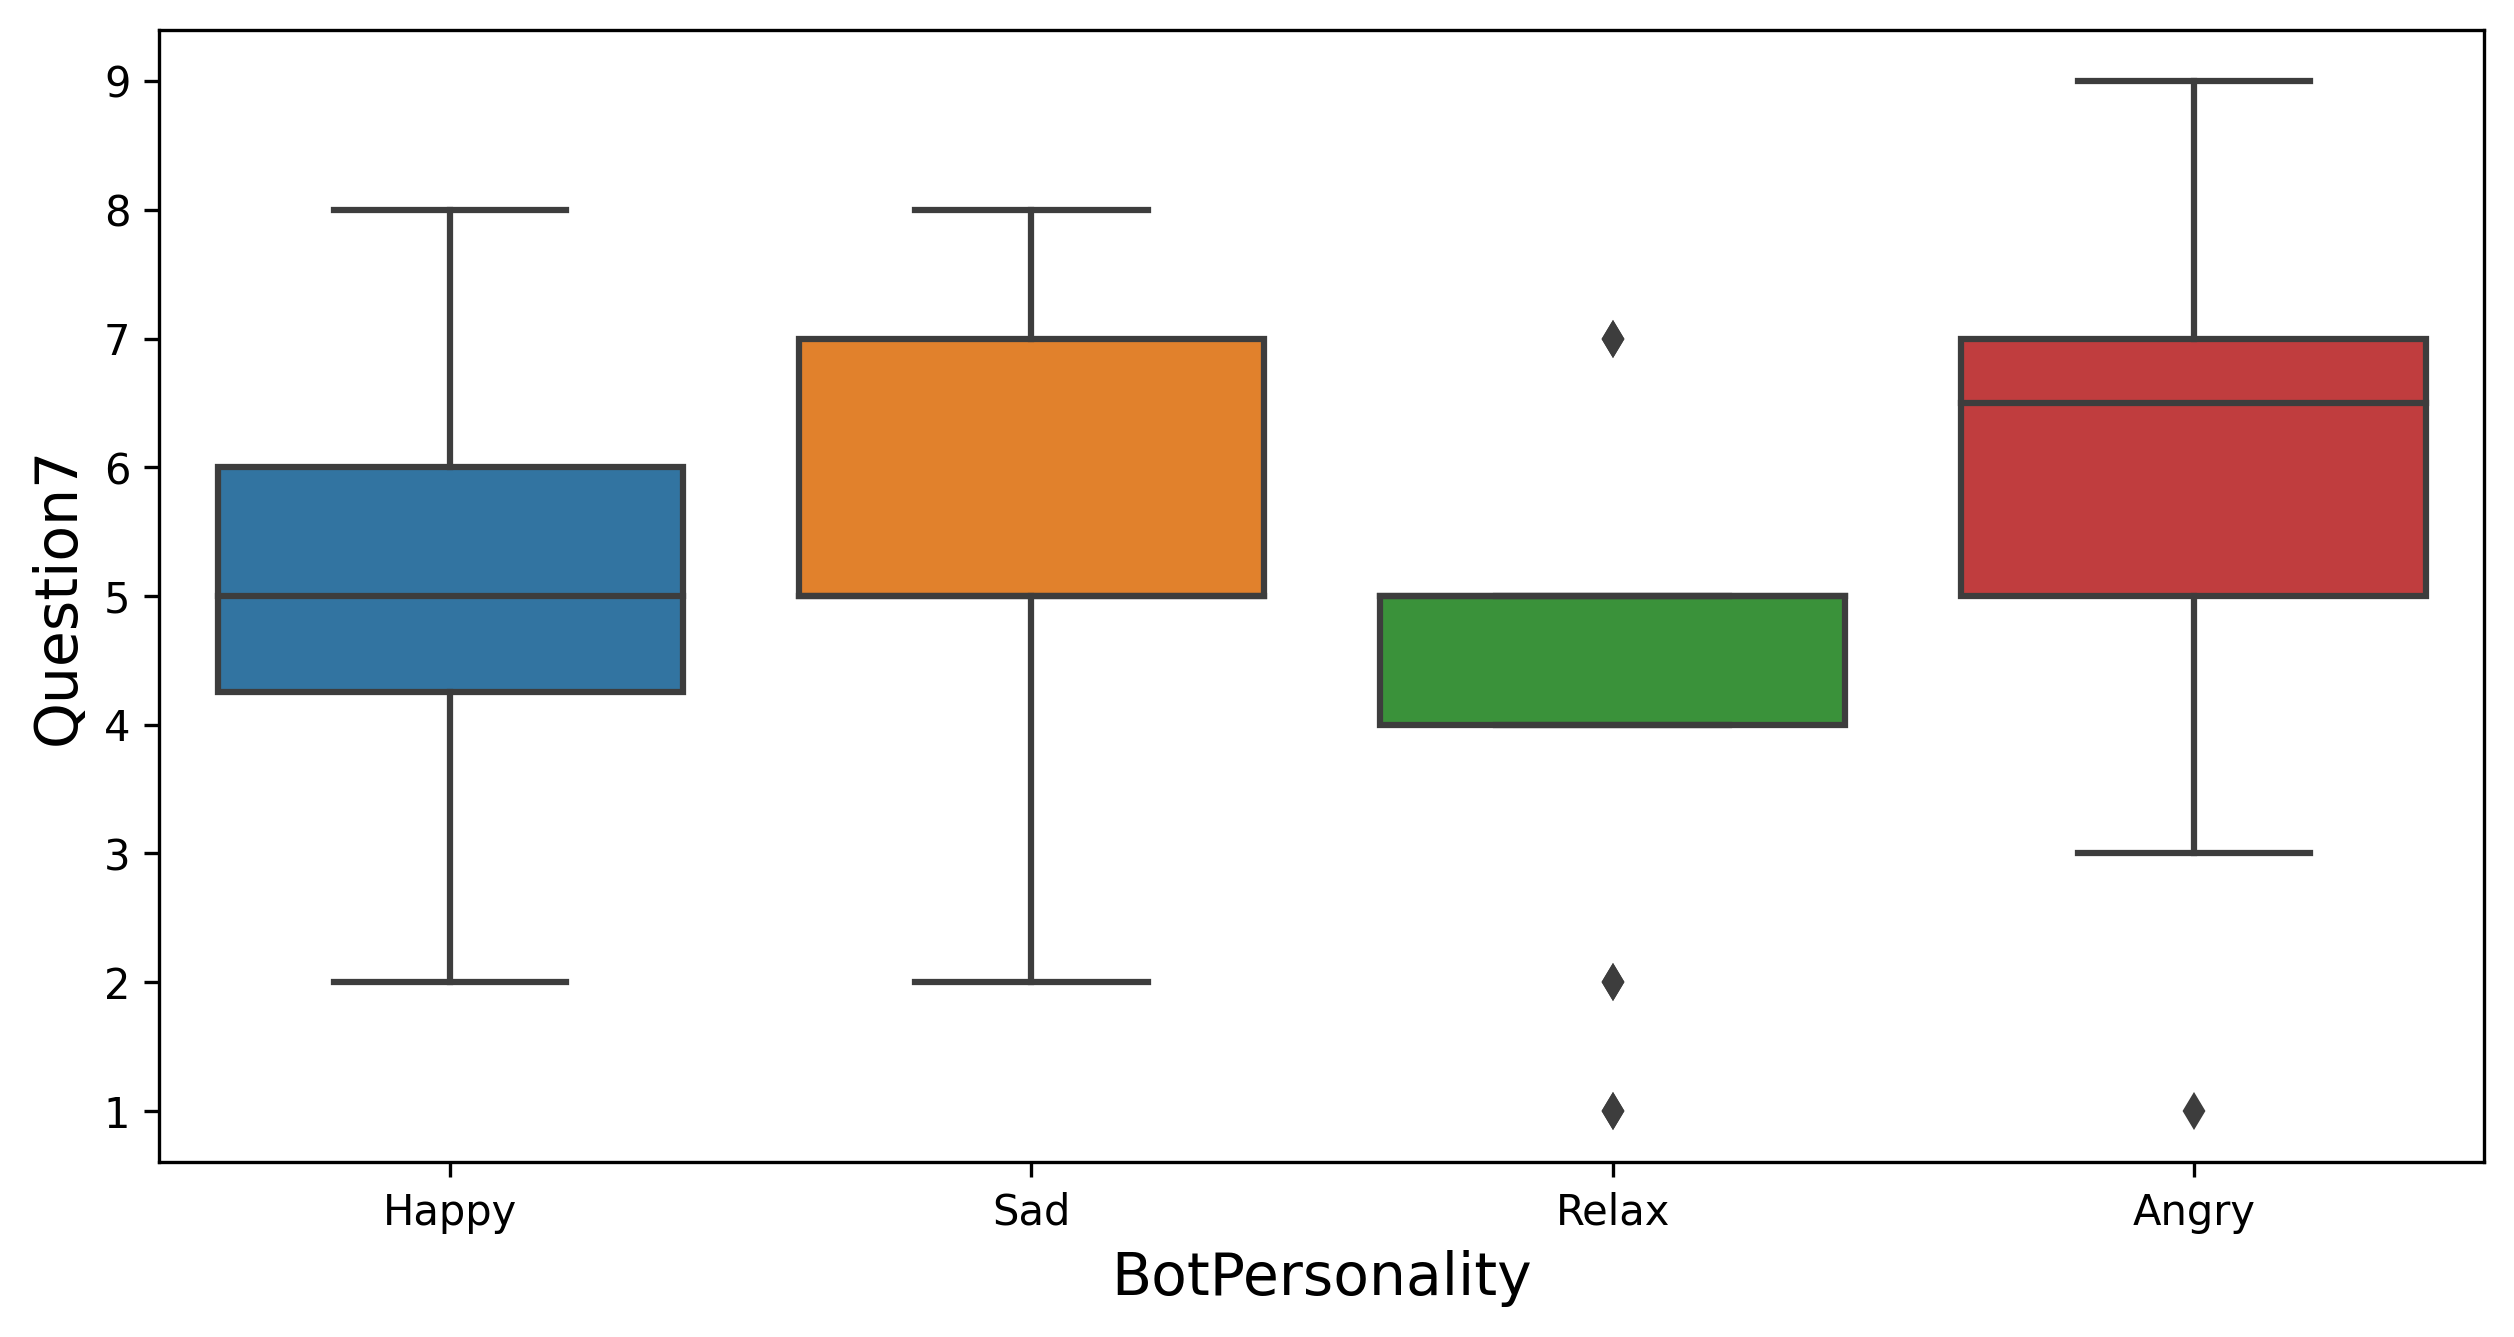

KS P-value 0.006668846028113762 with significance **
ANOVA P-value 0.01064835366418395 with significance *
P-value 0.01064835366418395 with significance *


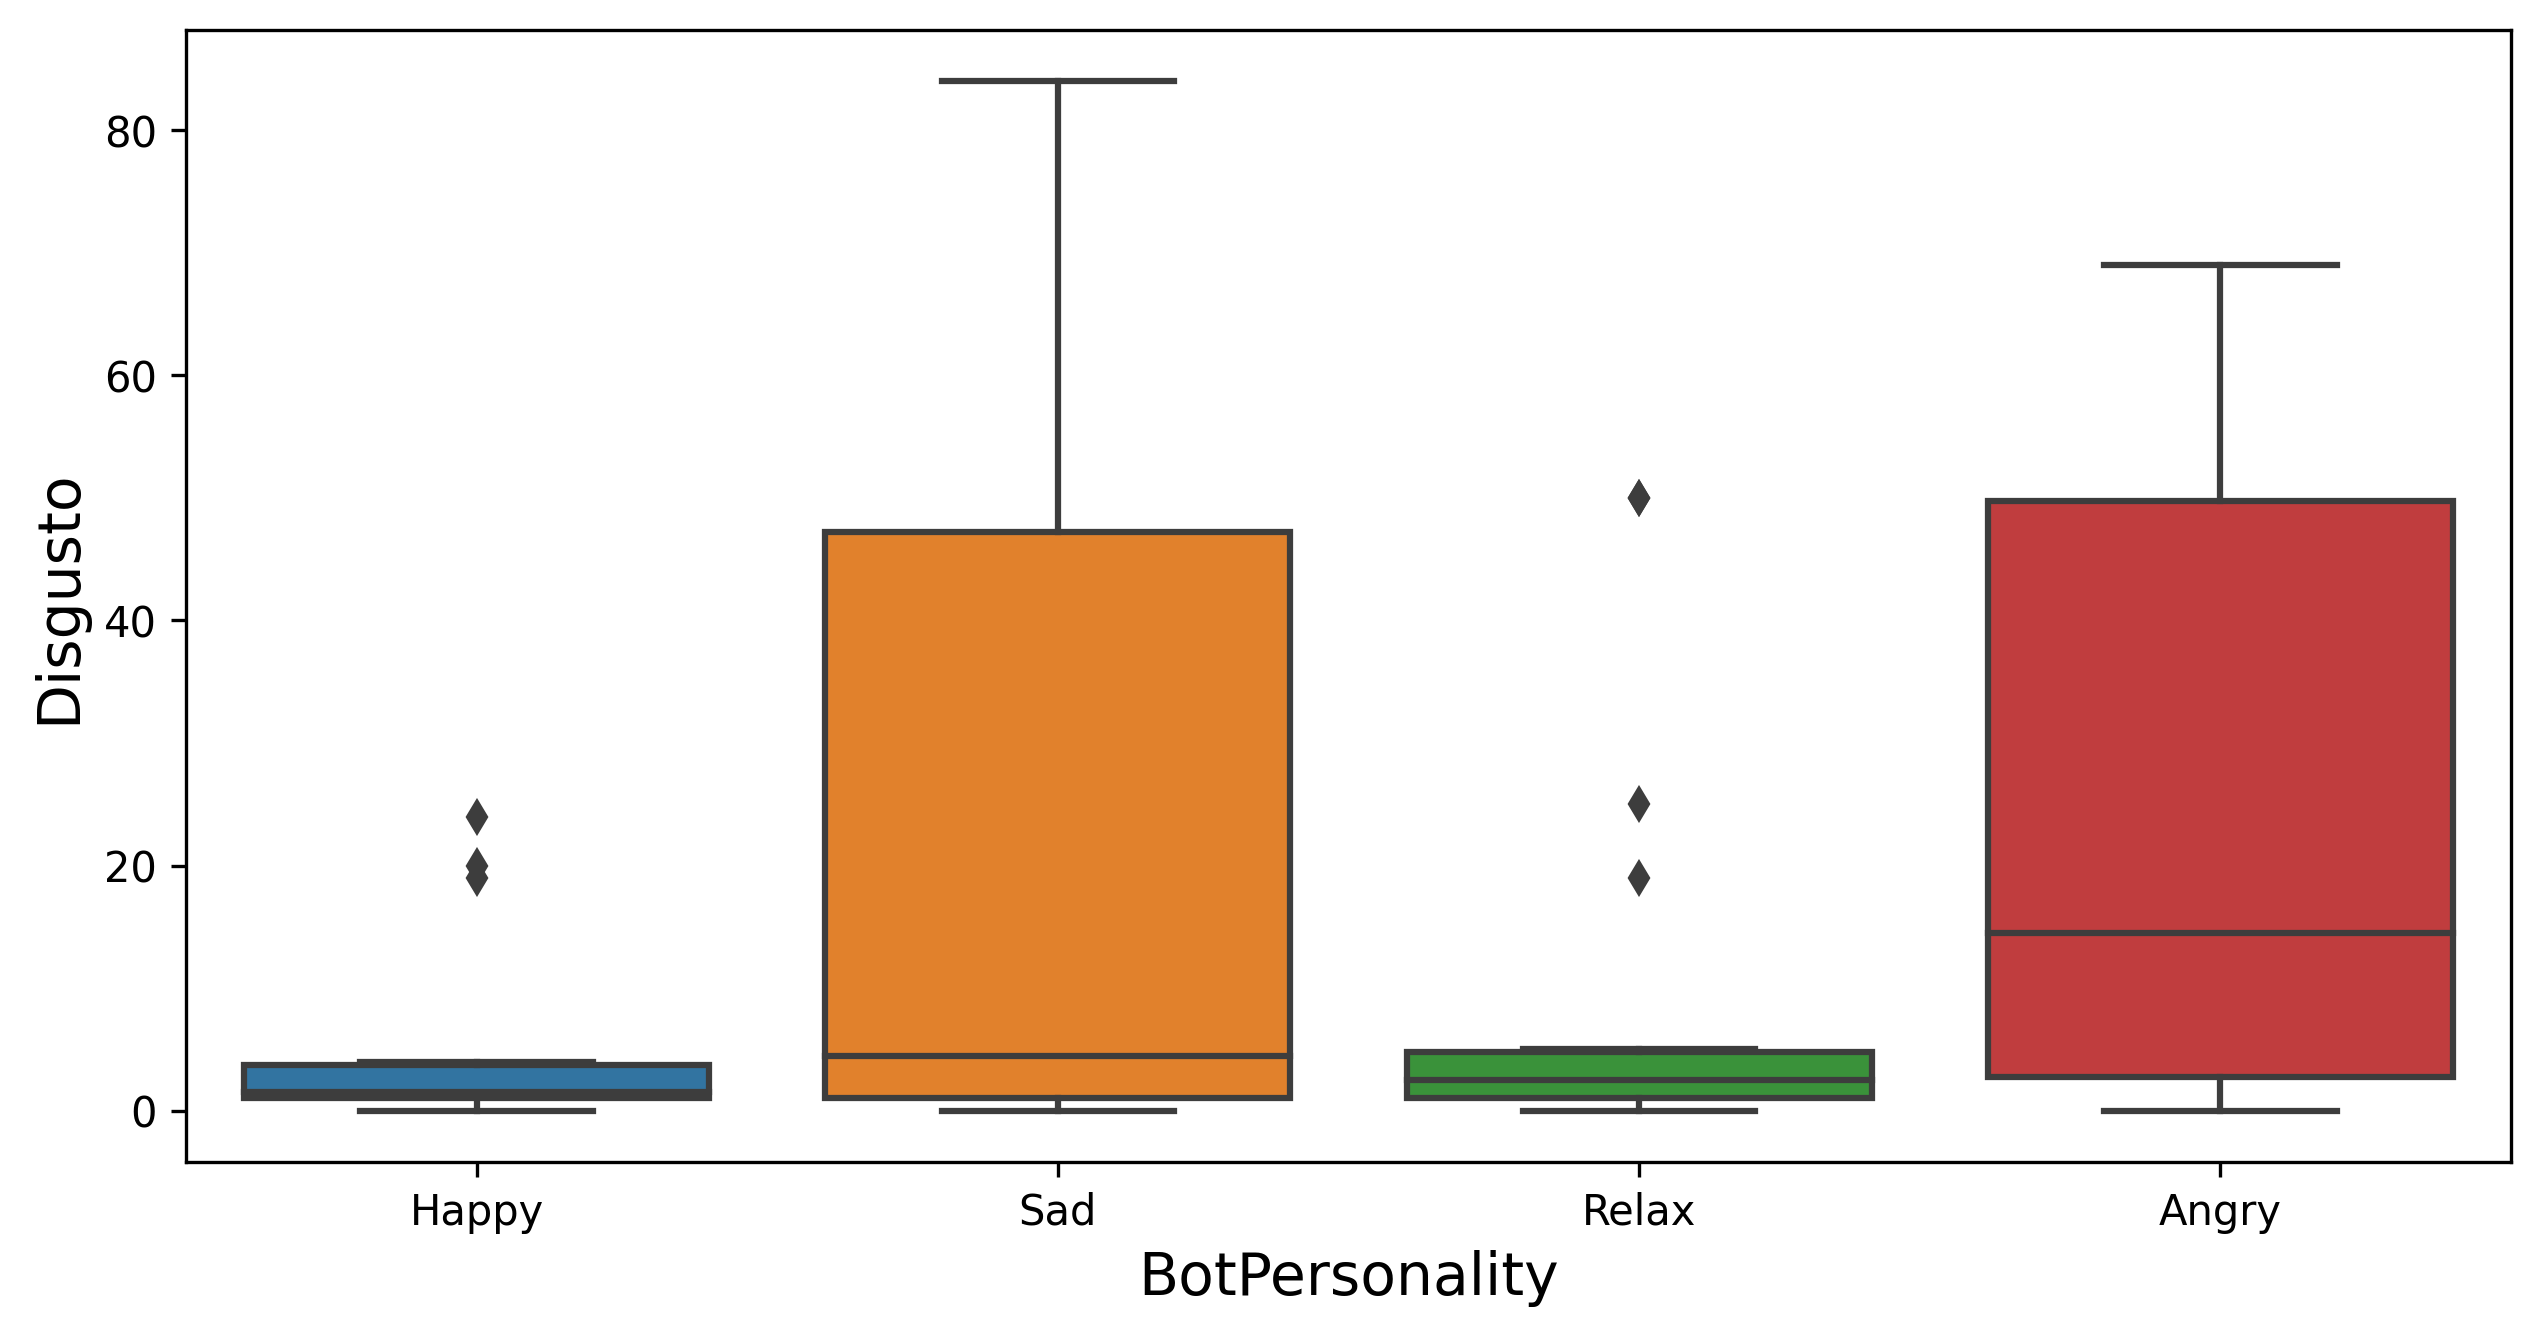

KS P-value 0.0004292590546831847 with significance ***
ANOVA P-value 9.010538201021032e-06 with significance ***
P-value 9.010538201021032e-06 with significance ***


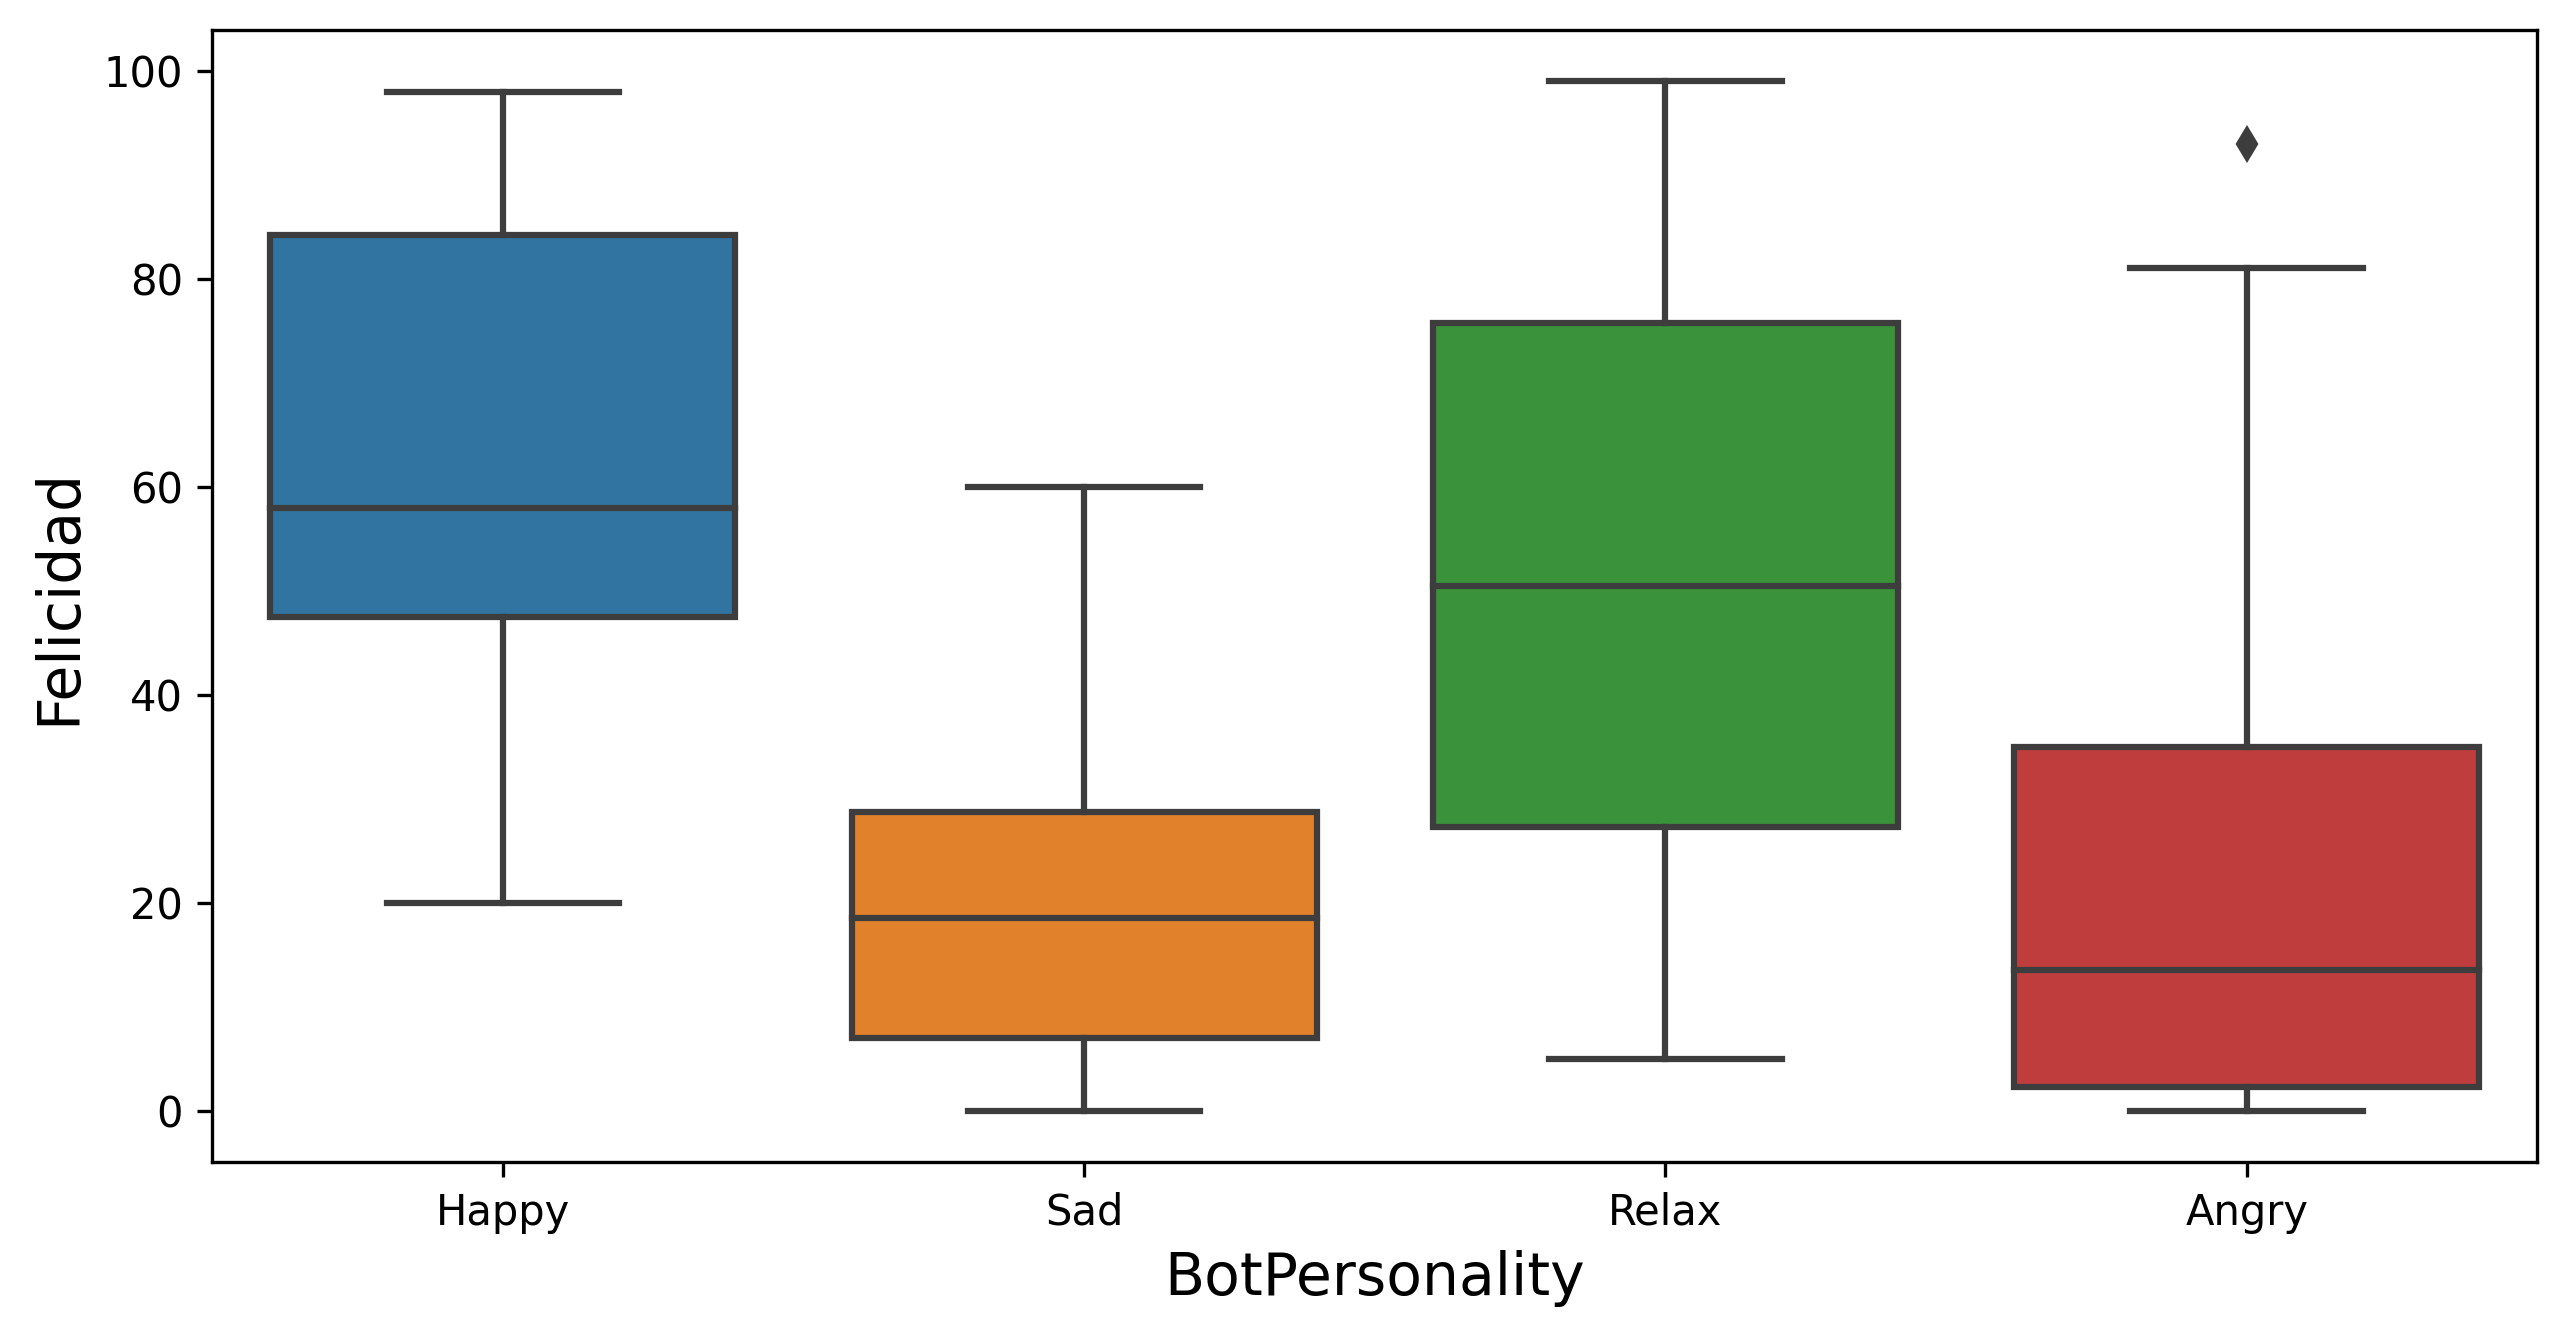

KS P-value 0.05601816779525039 with significance -
ANOVA P-value 0.016337795203498373 with significance *
P-value 0.016337795203498373 with significance *


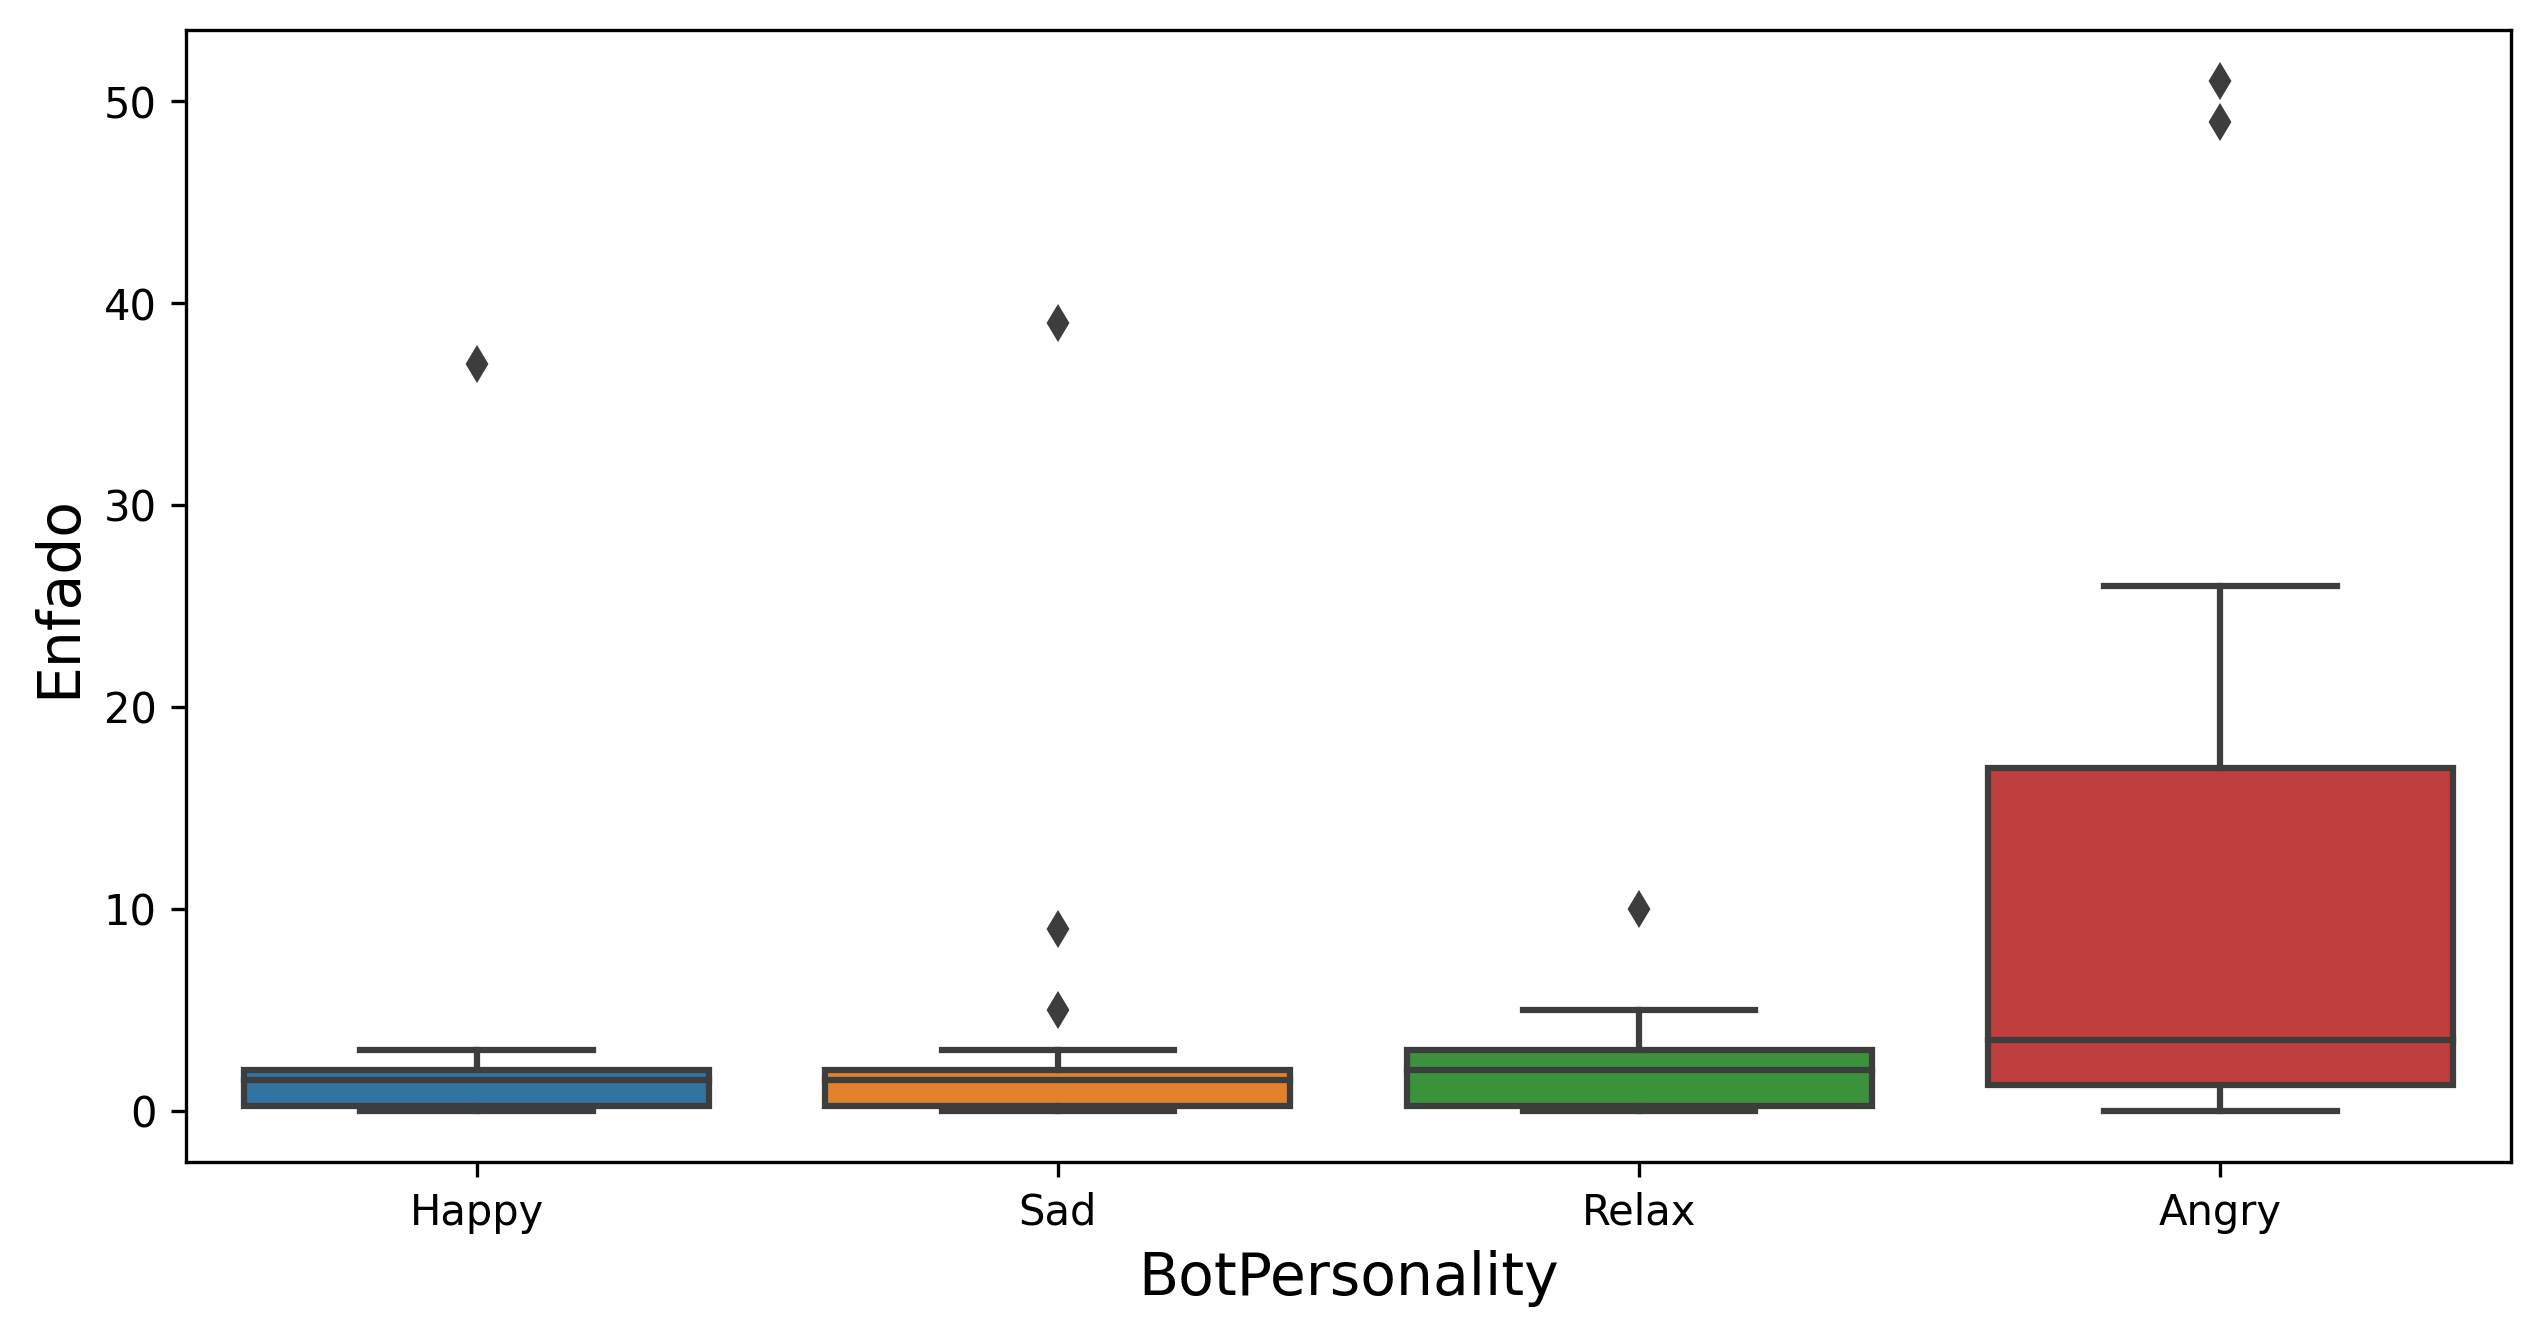

KS P-value 0.05601816779525039 with significance -
ANOVA P-value 1.7570849610169293e-05 with significance ***
P-value 1.7570849610169293e-05 with significance ***


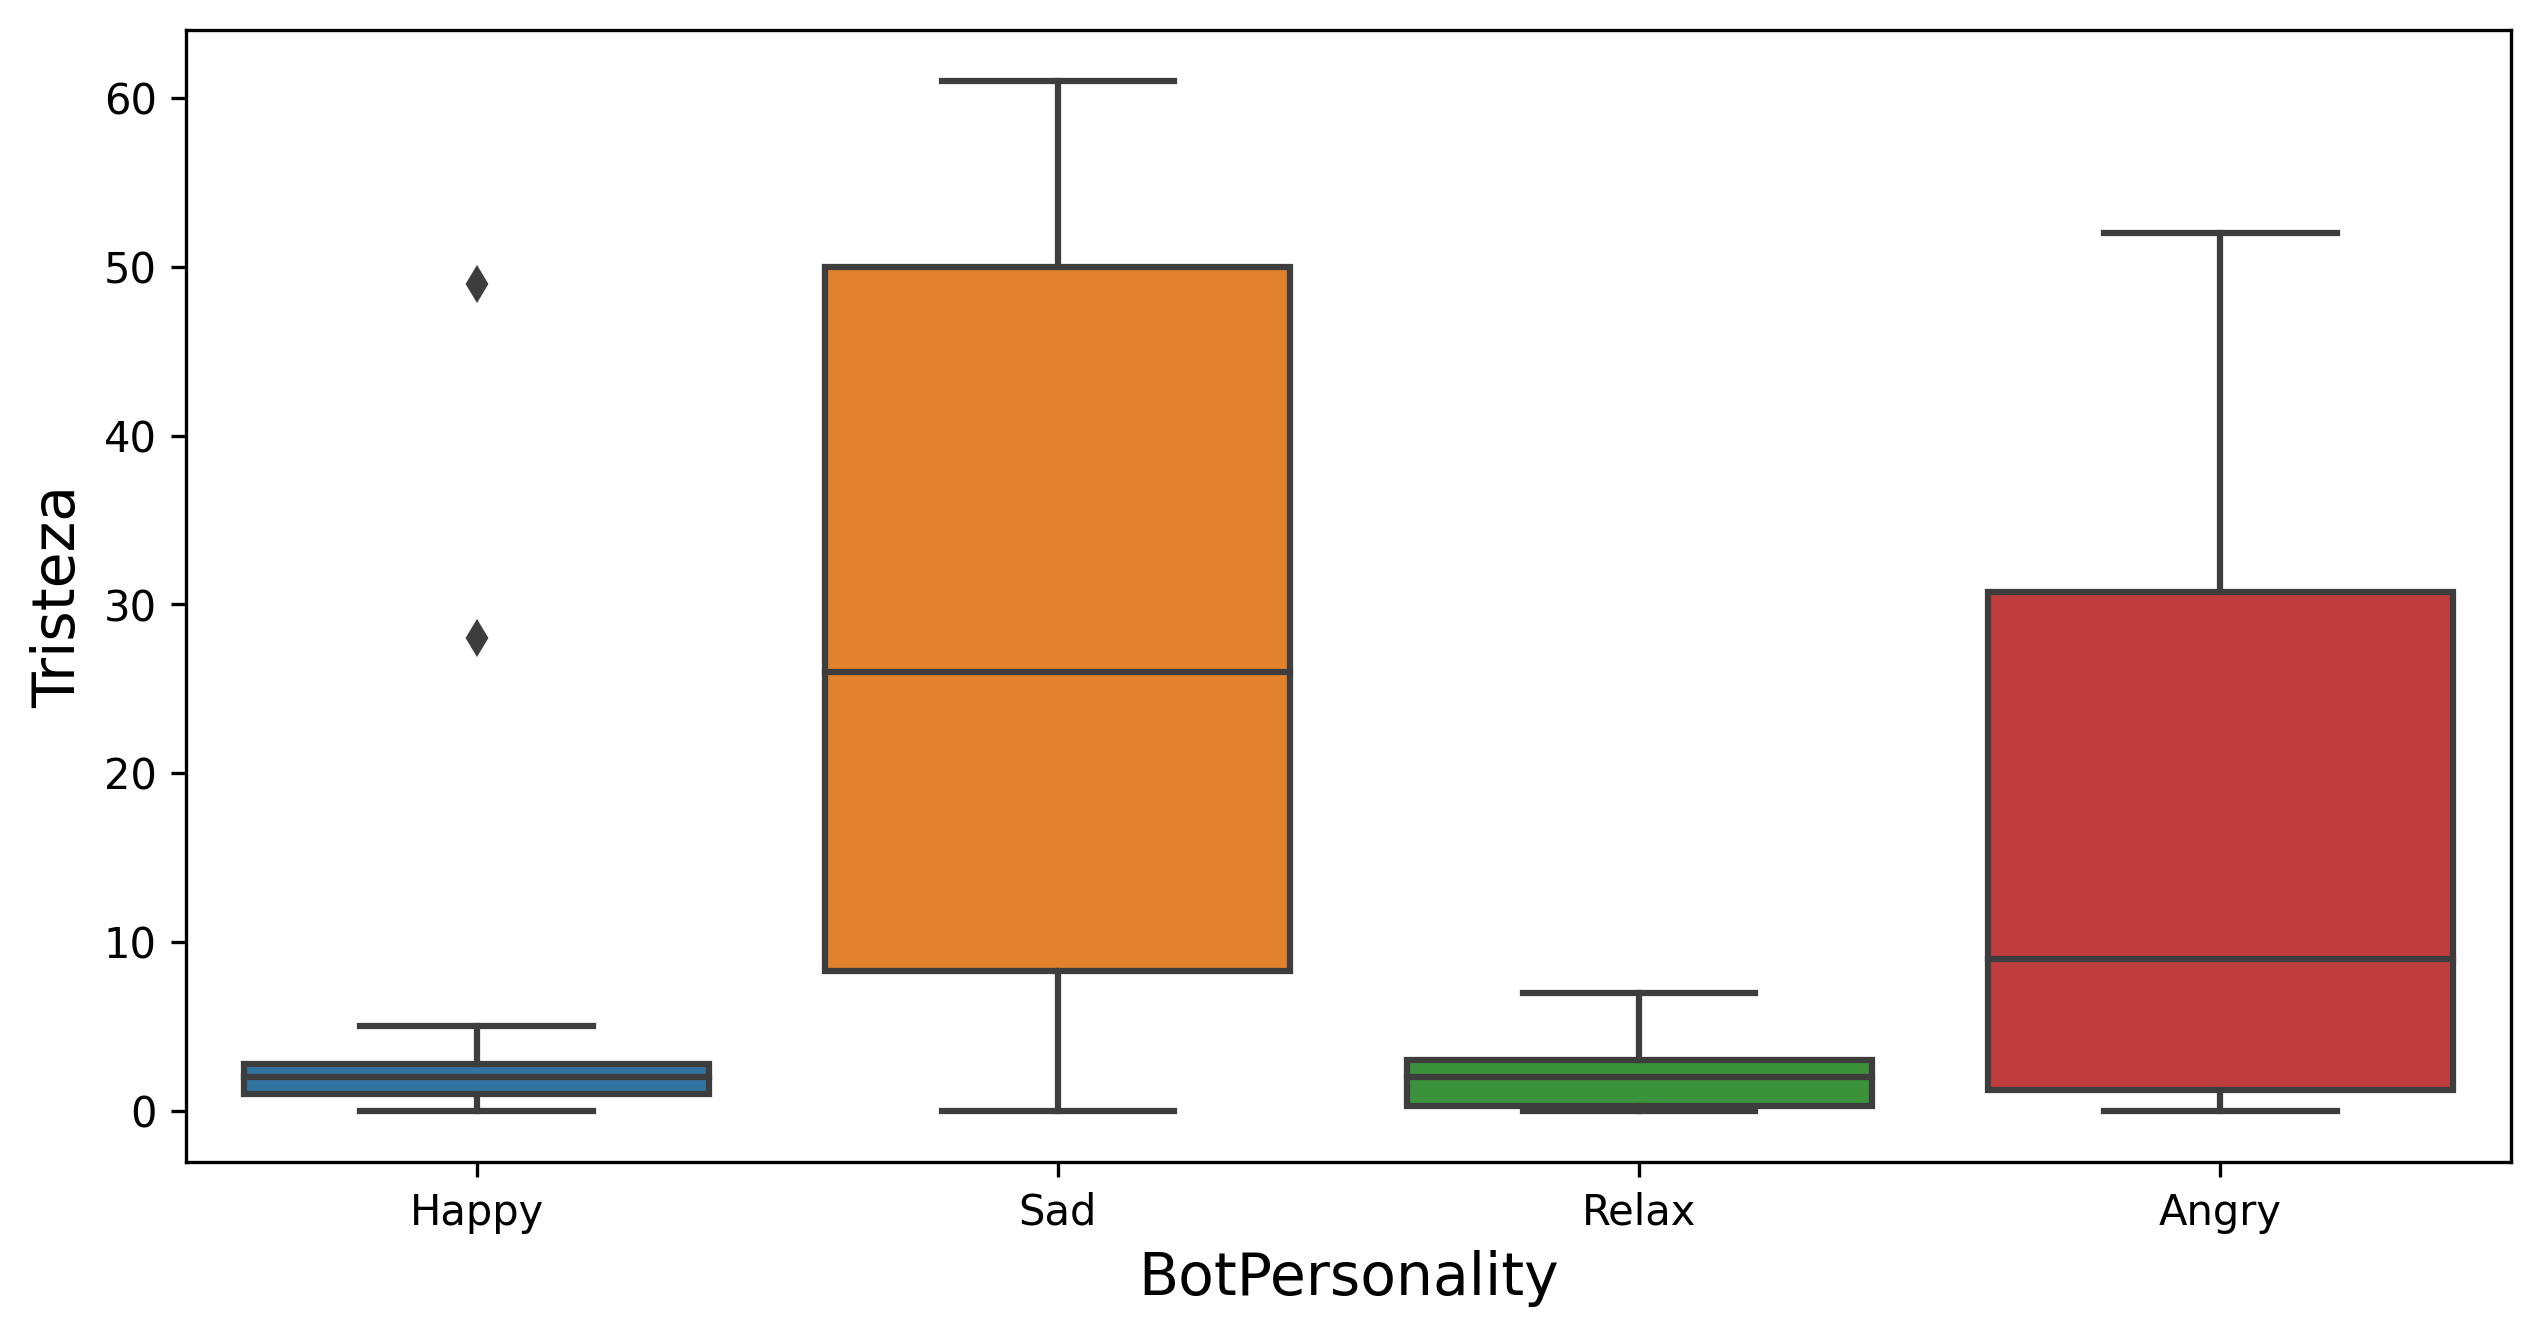

KS P-value 1.5735302591025833e-06 with significance ***
ANOVA P-value 5.2560720840948685e-09 with significance ***
P-value 5.2560720840948685e-09 with significance ***


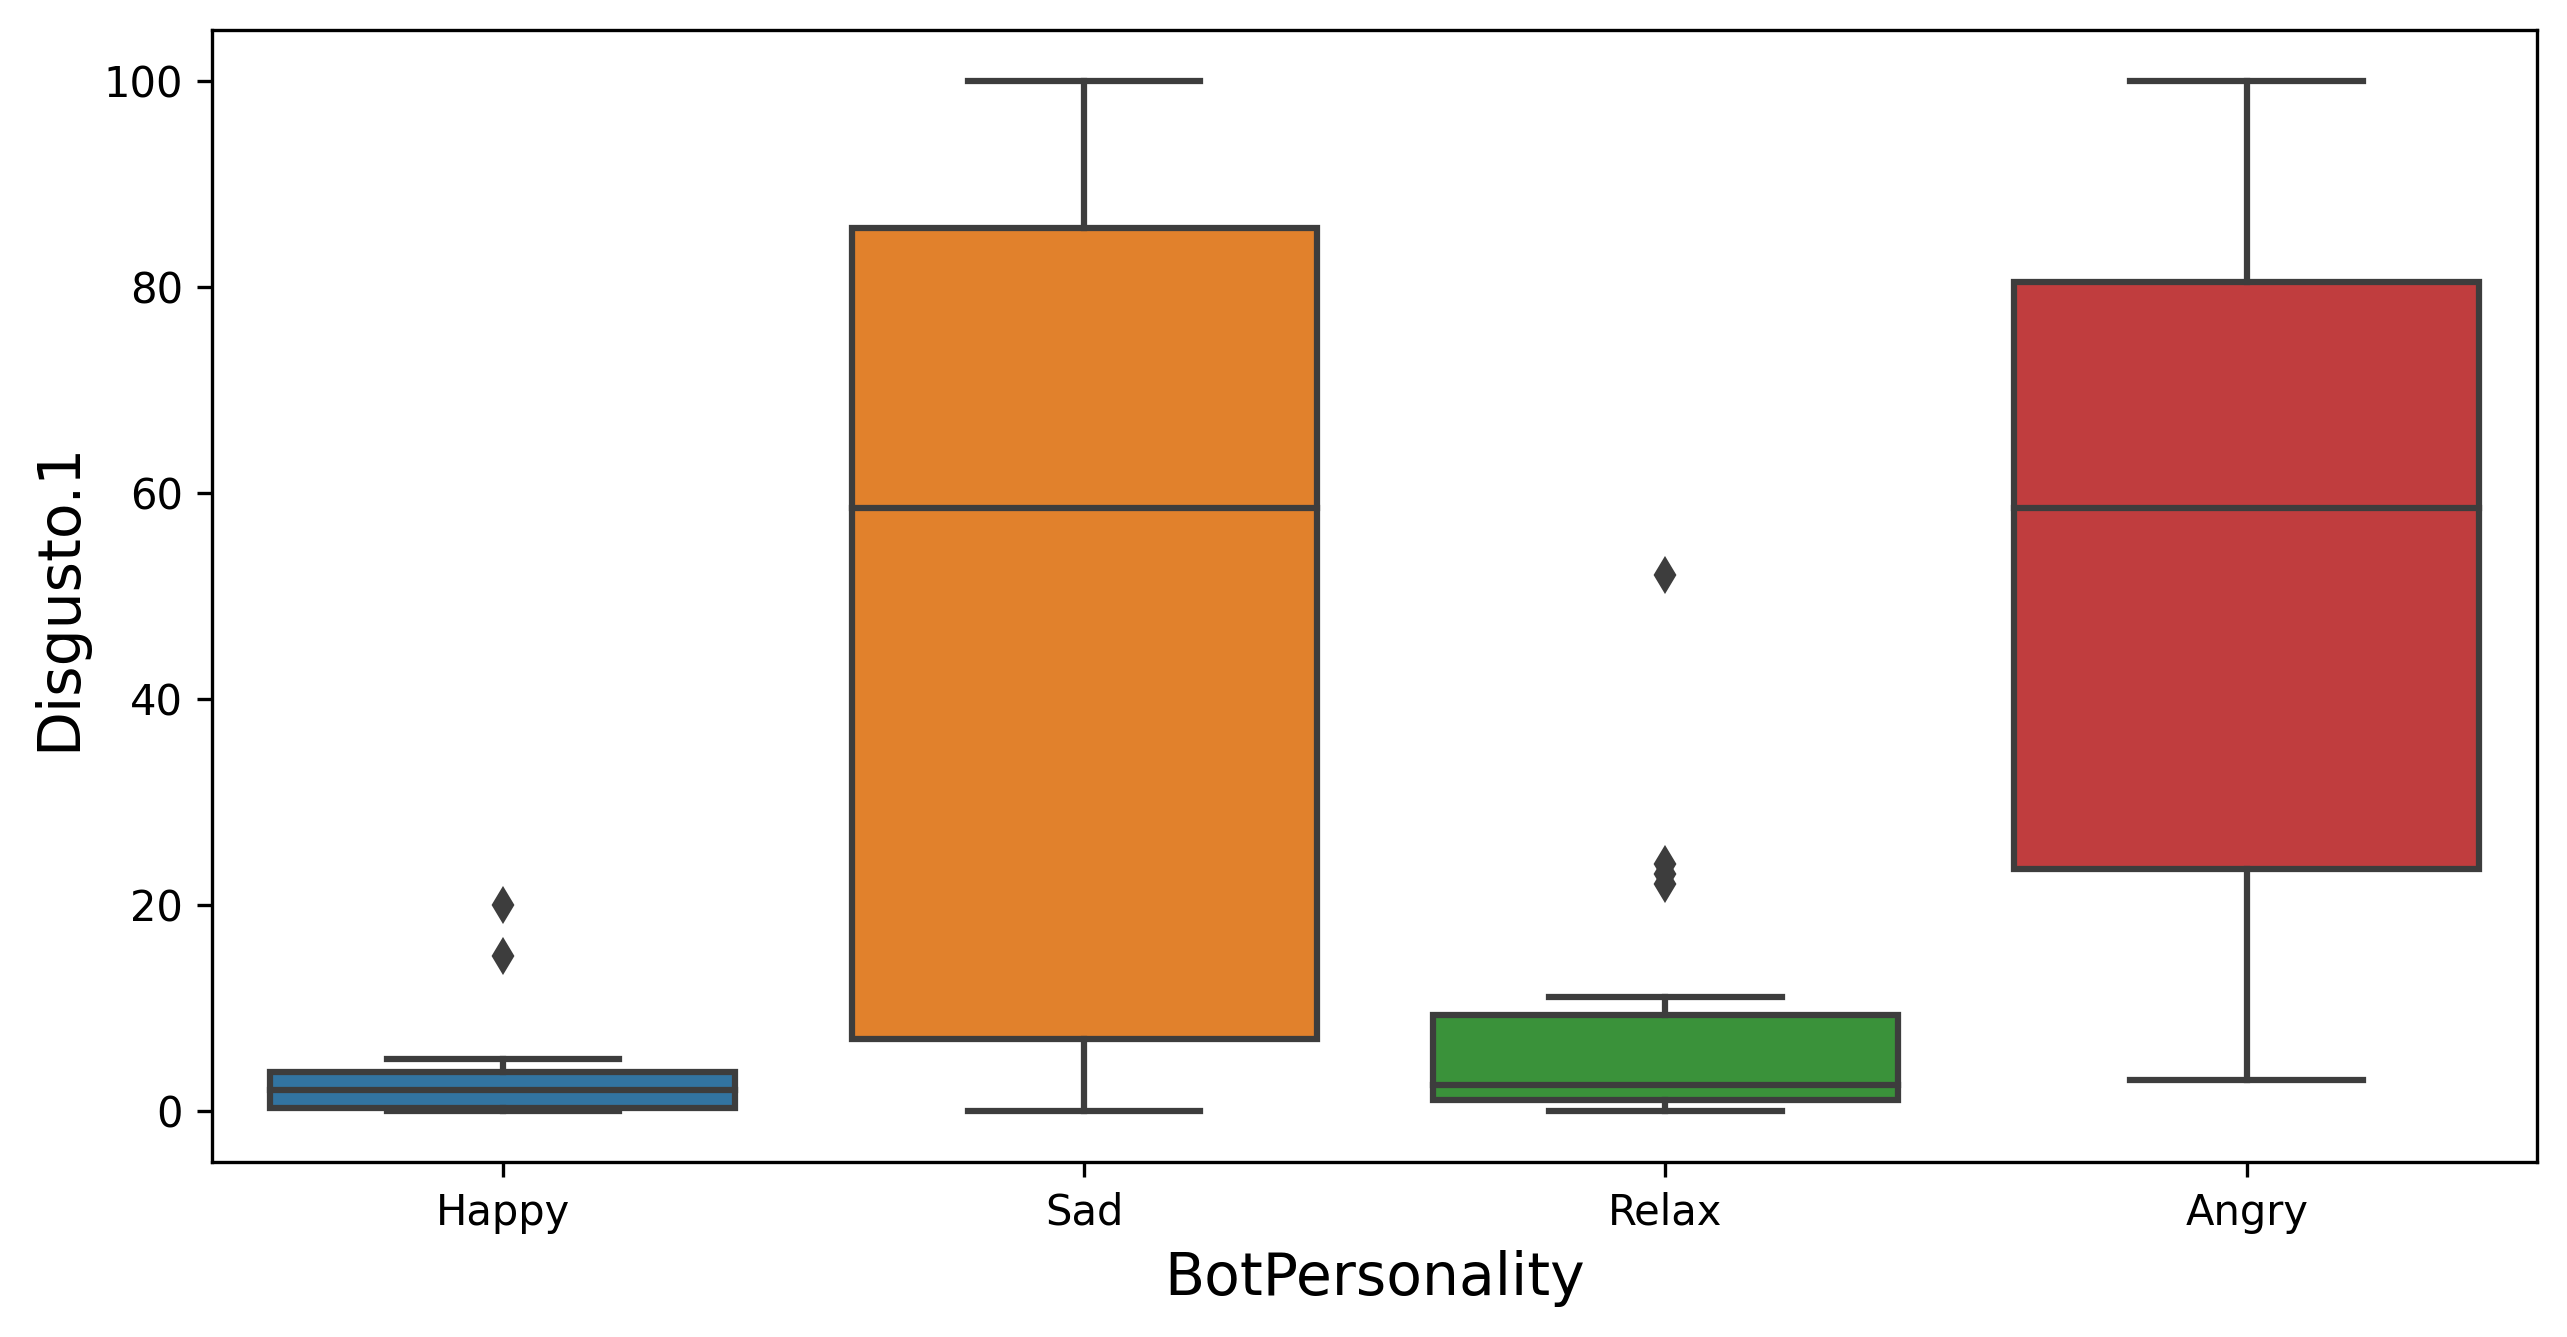

KS P-value 1.3884090521493383e-07 with significance ***
ANOVA P-value 5.211180471090594e-15 with significance ***
P-value 5.211180471090594e-15 with significance ***


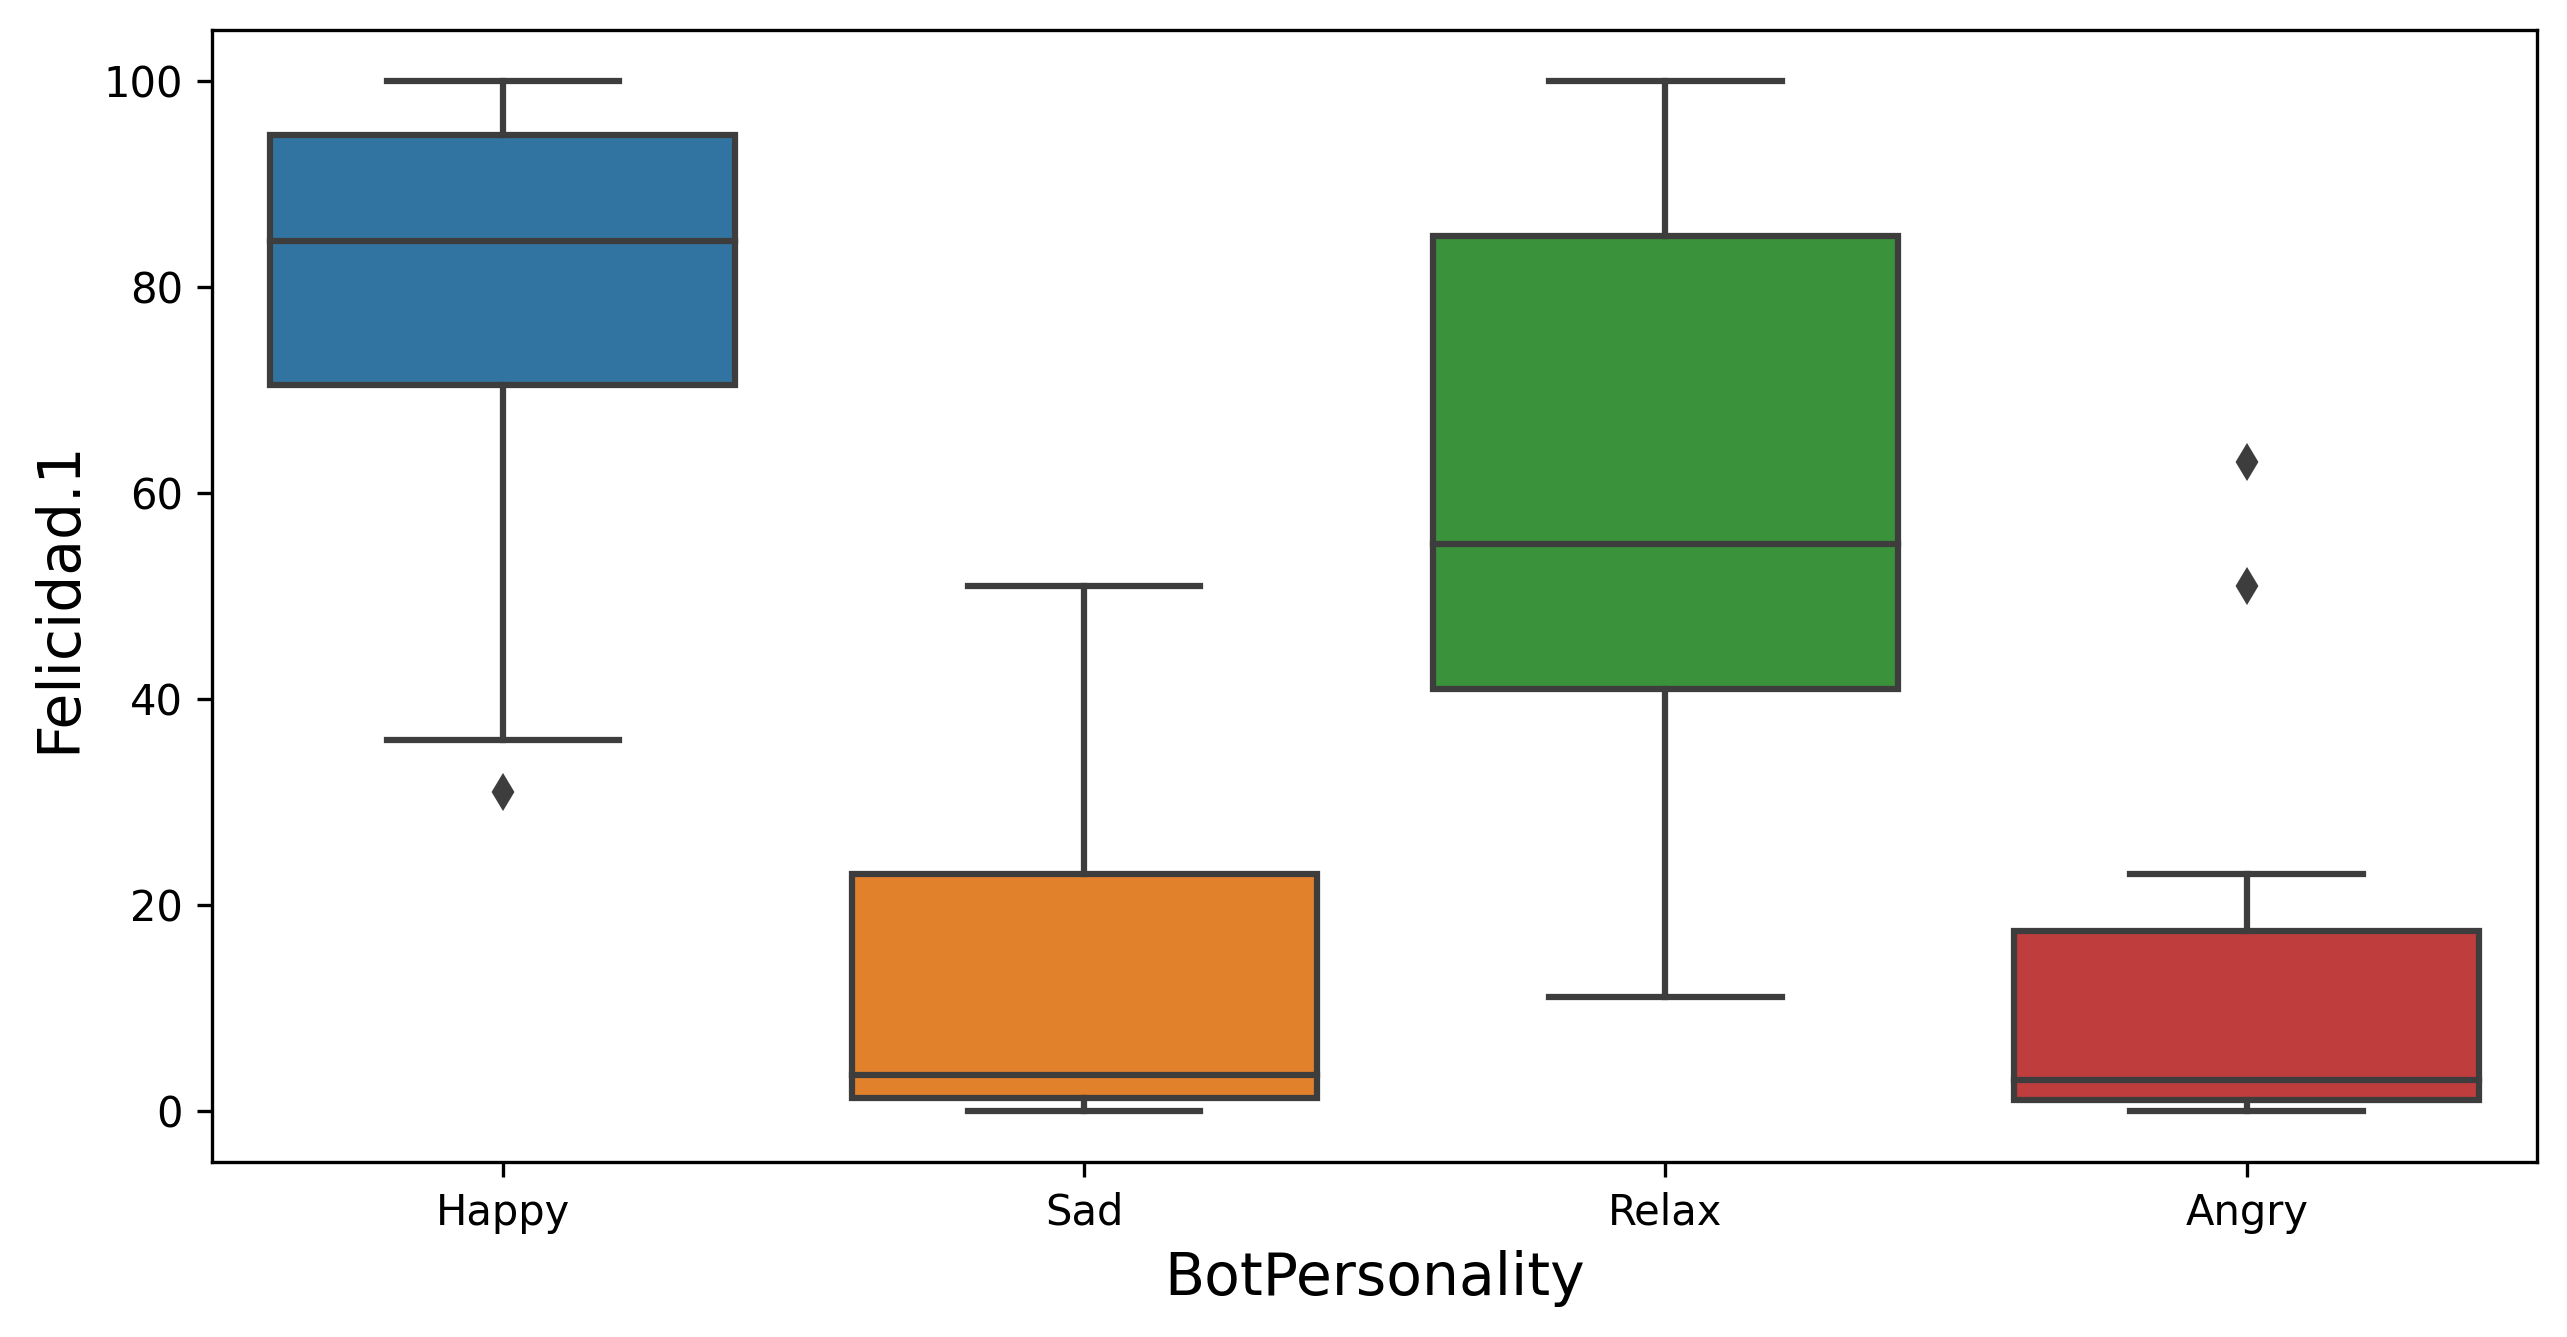

KS P-value 2.2038238923005368e-10 with significance ***
ANOVA P-value 5.280536096816849e-19 with significance ***
P-value 5.280536096816849e-19 with significance ***


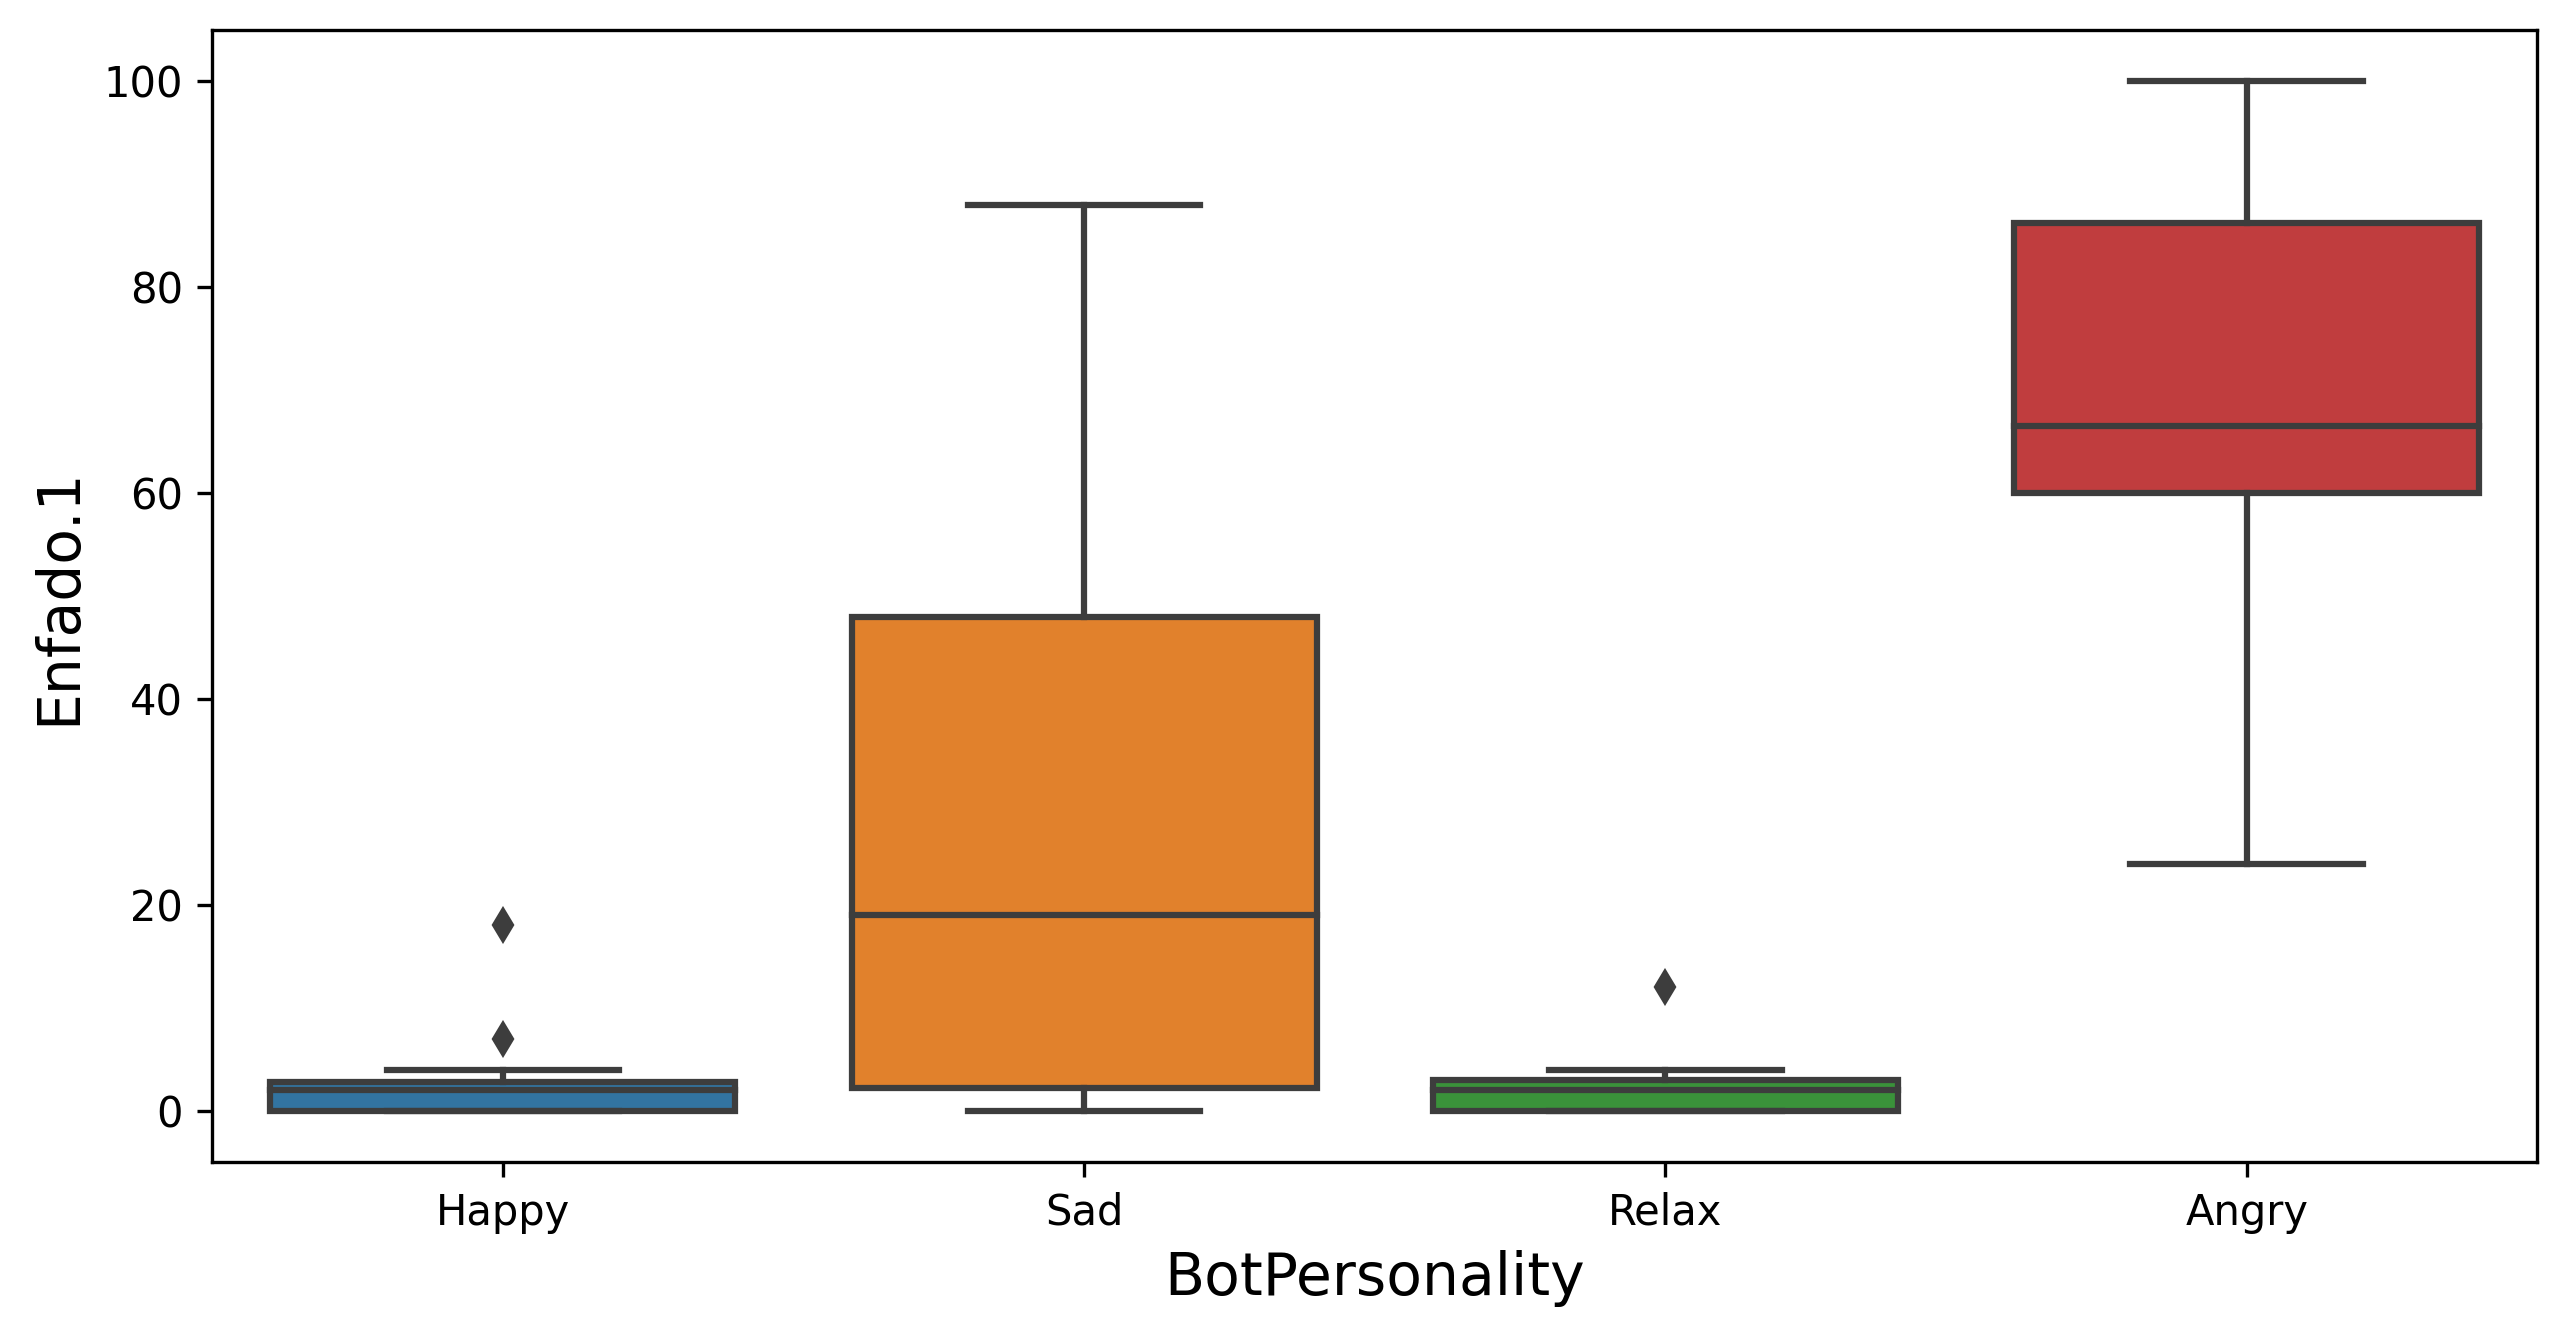

KS P-value 0.5025900605581054 with significance -
ANOVA P-value 9.740830515364225e-05 with significance ***
P-value 9.740830515364225e-05 with significance ***


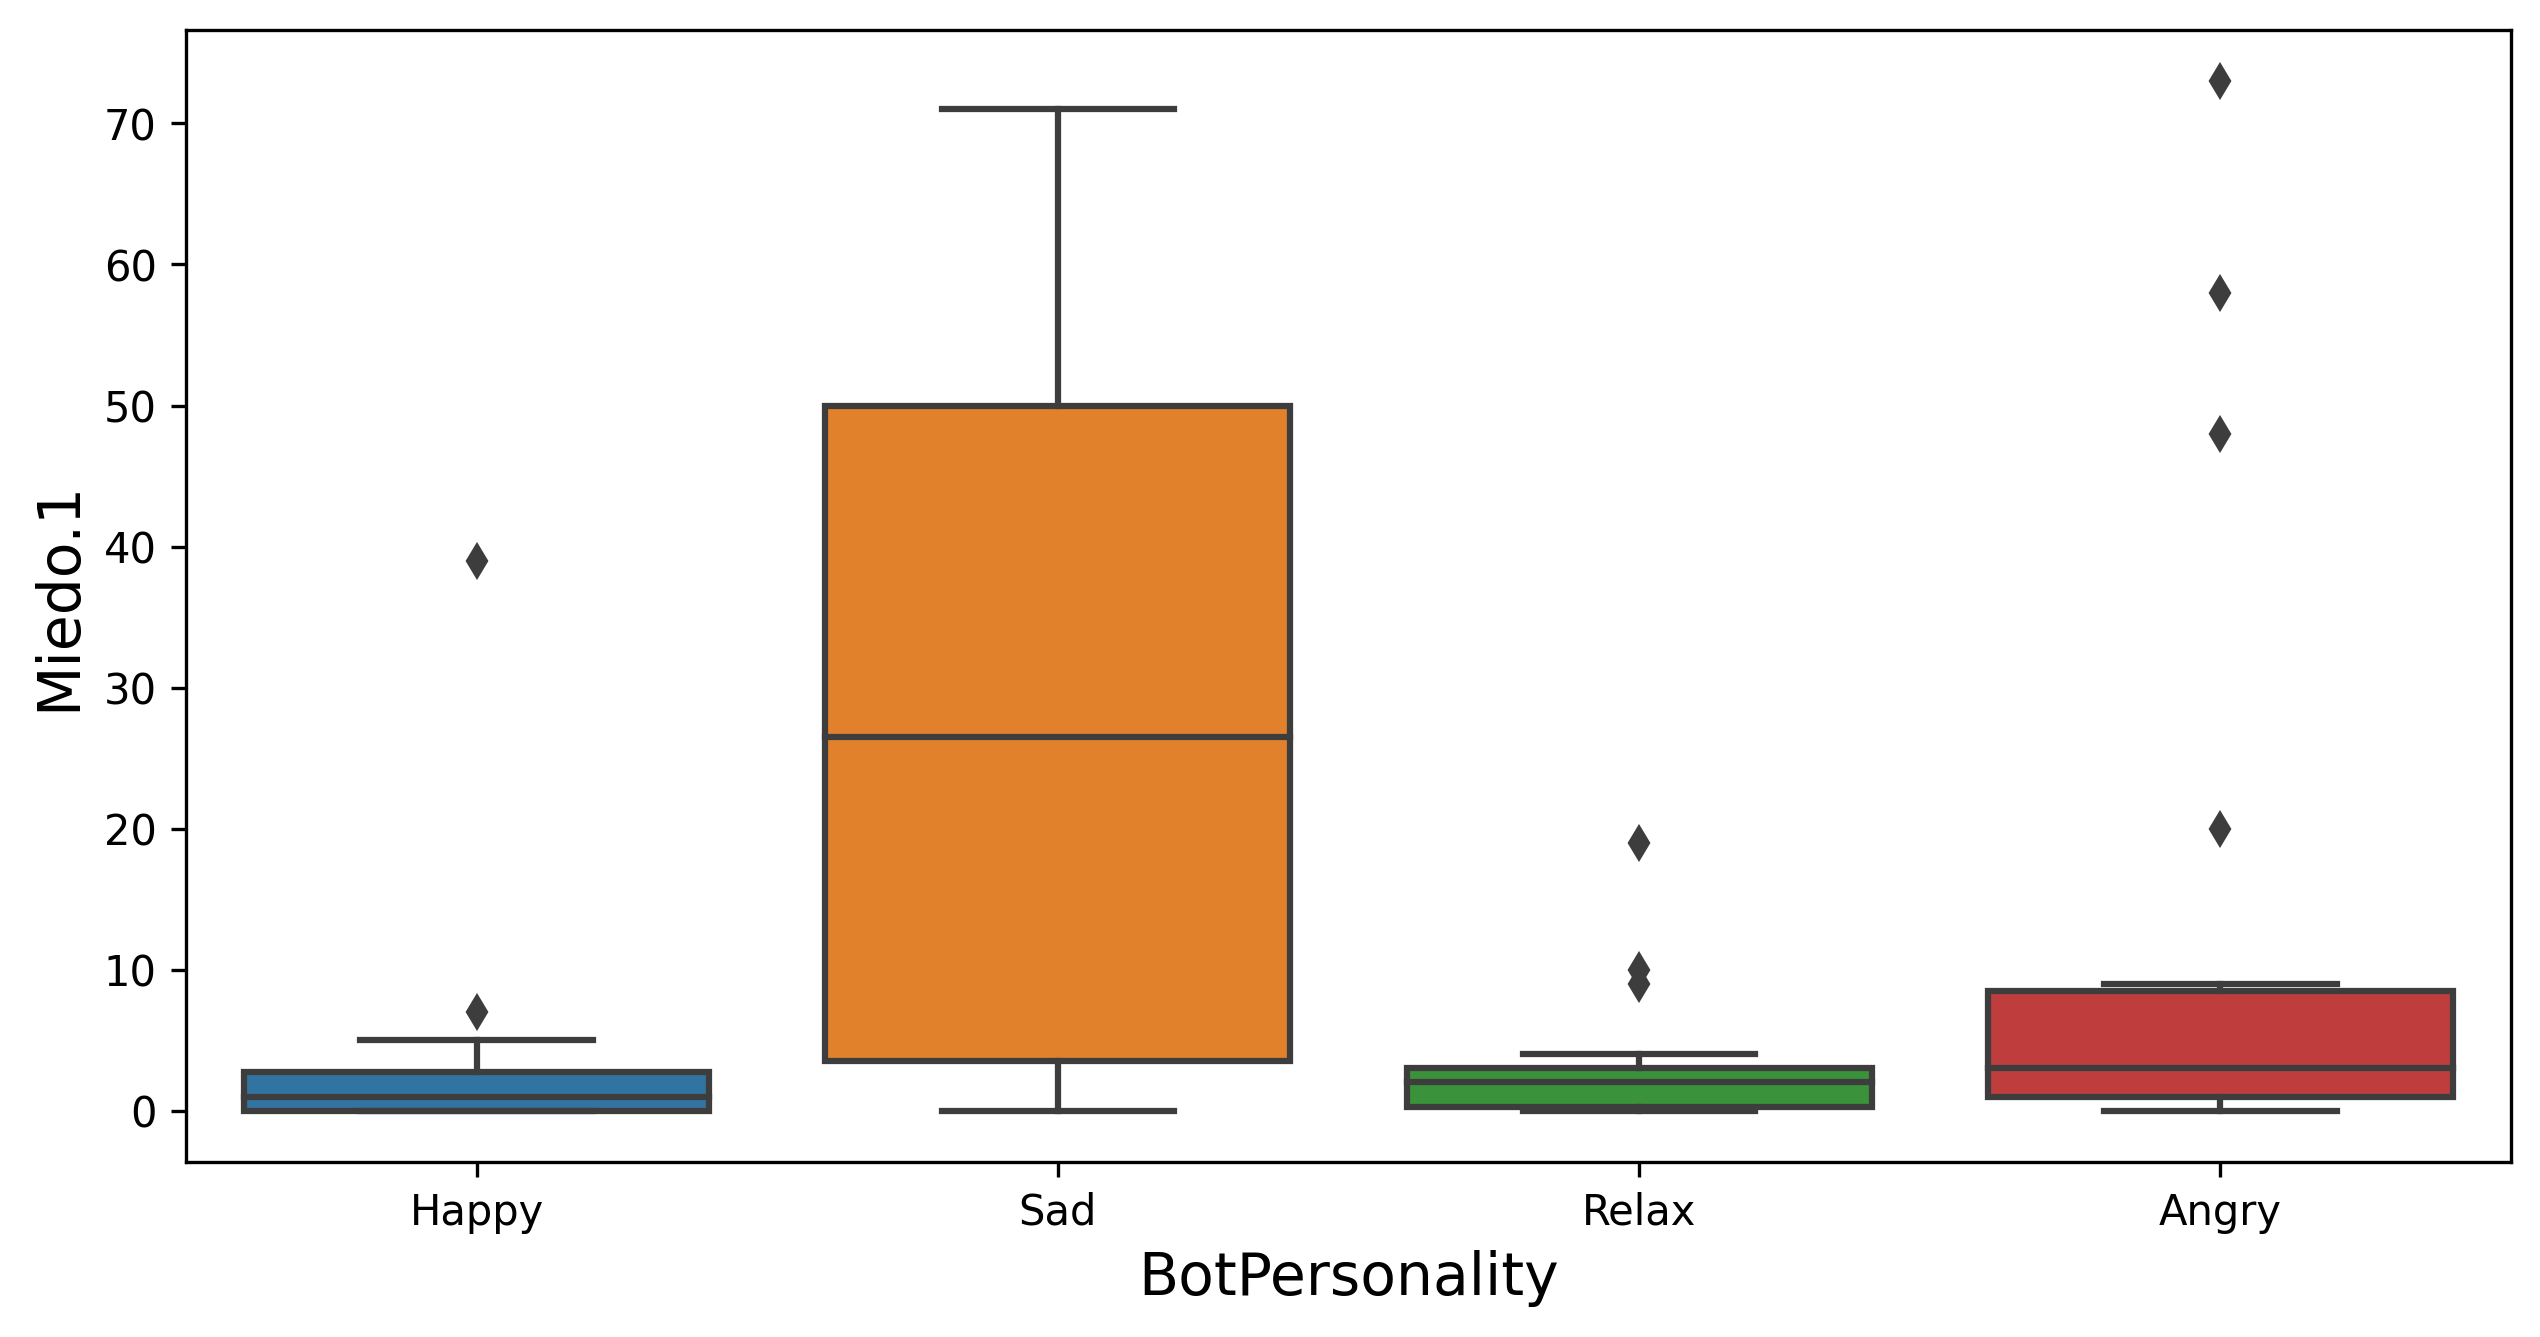

KS P-value 0.0004292590546831847 with significance ***
ANOVA P-value 5.760970159947576e-07 with significance ***
P-value 5.760970159947576e-07 with significance ***


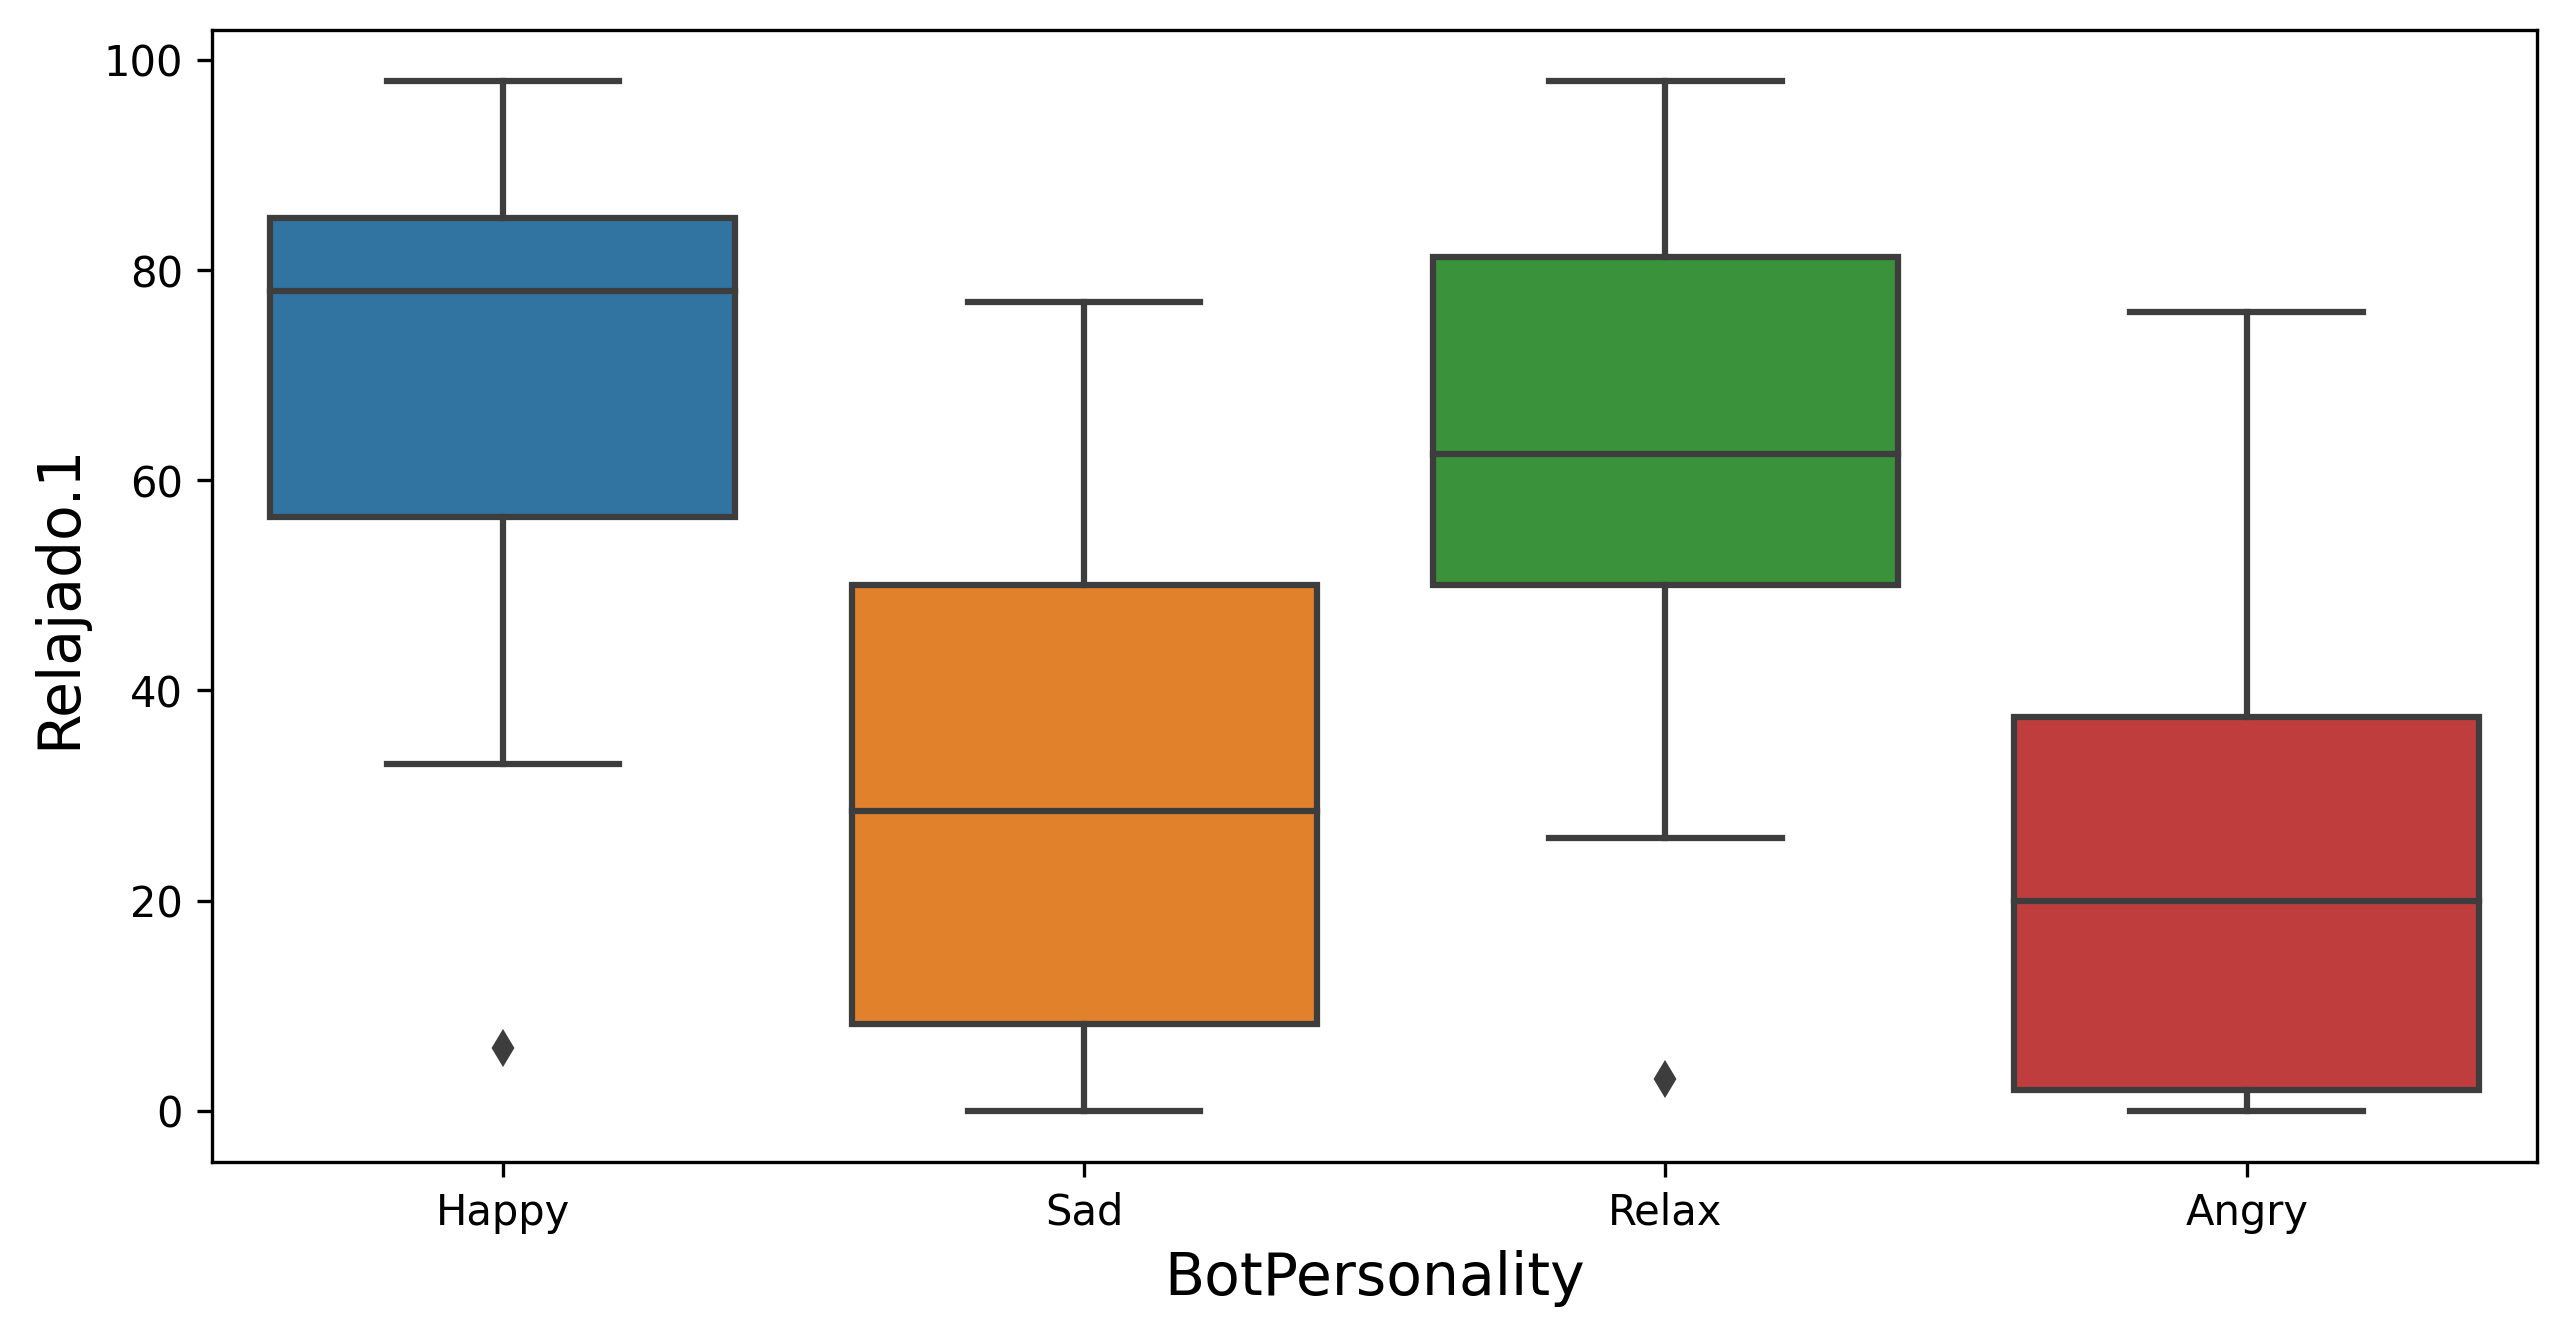

KS P-value 1.5735302591025833e-06 with significance ***
ANOVA P-value 6.019265152499084e-14 with significance ***
P-value 6.019265152499084e-14 with significance ***


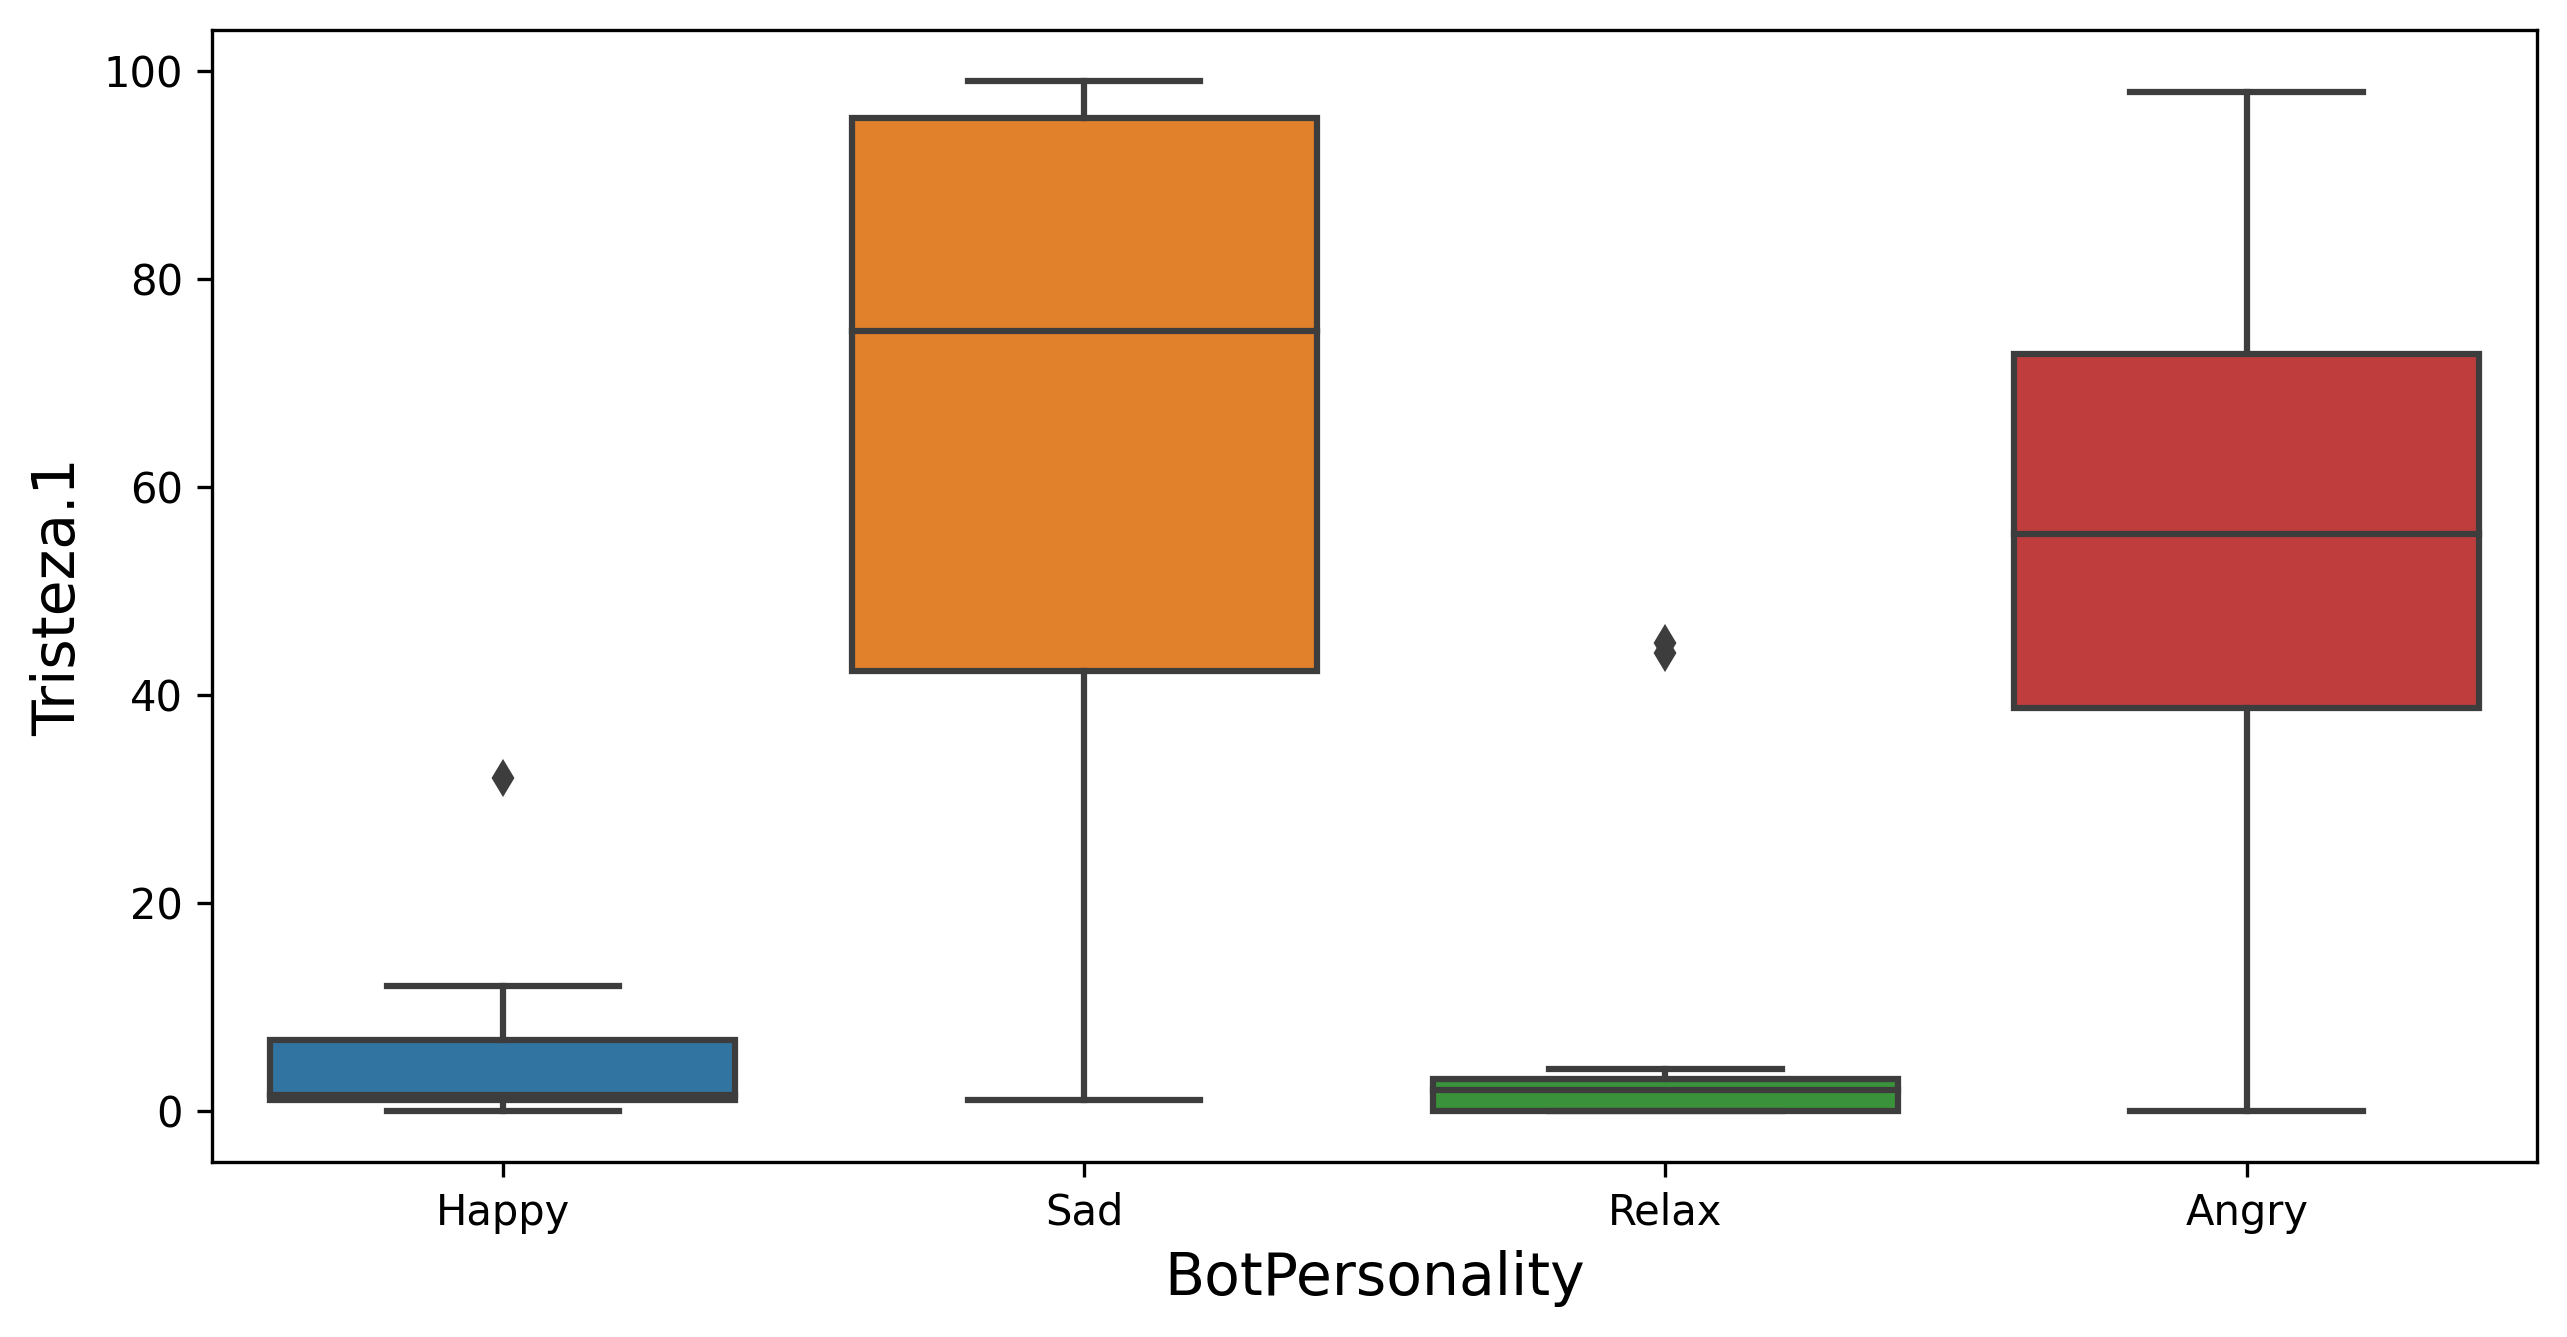

In [7]:
numerical_quest_features = [
    'Question1', 'Question2',
    'Question3', 'Question4', 'Question5', 'Question6', 'Question7',
    'Question8', 'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza', 'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

for col in numerical_quest_features:
    group_list = [df_g[col].tolist() for g, df_g in df_cp.groupby("BotPersonality")]
    _, p_value_anova = sp.stats.f_oneway(*group_list)
    _, p_value_ks = sp.stats.kstest(*group_list)
    if p_value_anova < 0.05 or p_value_ks < 0.05:
        print("KS P-value", p_value_ks, "with significance", aute.get_p_string(p_value_ks))
        print("ANOVA P-value", p_value_anova, "with significance", aute.get_p_string(p_value_anova))
        aute.make_binary_plot(data=df_cp, 
                              x_feat="BotPersonality", x_name="BotPersonality", 
                              y_feat=col, y_name=col)

In [8]:
numerical_conv_features = [
    "ConvTime_s",
    "NumSamples",
    "PersonNumUniqWords",
    "PersonNumUniqWordsClean",
    "PersonNumWords",
    "PersonNumWordsClean",
    'Mean_PersonTalk',
    'Max_PersonTalk', 
    'Min_PersonTalk',
    'Diff_PersonTalk',
    "PersonNumQuestions",
    "AboveMaximumTime"
]

## Correlations

In [9]:
feat_to_ml = numerical_quest_features.copy()
feat_to_ml += numerical_conv_features

In [10]:
for i_c, col_name_i in enumerate(feat_to_ml[:-1]):
    for col_name_j in feat_to_ml[(i_c+1):]:
        corr_v, p_value = sp.stats.pearsonr(df_cp[col_name_i].values, df_cp[col_name_j].values)
        if np.abs(corr_v) > 0.5 or p_value < 0.001:
            print("Feature", col_name_i, "and", col_name_j, "have corr value", corr_v, "with p-value", p_value)

Feature Question1 and Question2 have corr value 0.6746817063395049 with p-value 8.132395751981595e-11
Feature Question1 and Question3 have corr value 0.5528063994416471 with p-value 4.774526254183006e-07
Feature Question1 and Question5 have corr value 0.4893613628357342 with p-value 1.2875105079499673e-05
Feature Question1 and Relajado have corr value 0.4315548222375986 with p-value 0.0001537806155476489
Feature Question2 and Question3 have corr value 0.4870236489502163 with p-value 1.4360830501683778e-05
Feature Question2 and Question8 have corr value 0.48729672541248314 with p-value 1.4179376254937118e-05
Feature Question3 and Question6 have corr value 0.6369359188766718 with p-value 1.8023126510294974e-09
Feature Question3 and Disgusto have corr value -0.6018348617308034 with p-value 2.2497900344713576e-08
Feature Question3 and Felicidad have corr value 0.6053062931687854 with p-value 1.7767044100208978e-08
Feature Question3 and Relajado have corr value 0.43836203811760627 with p-va

In [11]:
for col_name_i in numerical_quest_features:
    for col_name_j in numerical_conv_features:
        corr_v, p_value = sp.stats.pearsonr(df_cp[col_name_i].values, df_cp[col_name_j].values)
        if np.abs(corr_v) > 0.3 or p_value < 0.005:
            print("Feature", col_name_i, "and", col_name_j, "have corr value", corr_v, "with p-value", p_value)

Feature Question3 and NumSamples have corr value 0.31688291993218065 with p-value 0.006686718885812677
Feature Question5 and PersonNumQuestions have corr value 0.3179856651660219 with p-value 0.006488511194124181
Feature Disgusto and NumSamples have corr value -0.36630176411981186 with p-value 0.0015532780378566383
Feature Disgusto and Mean_PersonTalk have corr value 0.3622884065735484 with p-value 0.0017642505534748911
Feature Disgusto and Max_PersonTalk have corr value 0.32782300904126915 with p-value 0.004936940277422487
Feature Felicidad and ConvTime_s have corr value 0.3105386894144738 with p-value 0.007933796489231641
Feature Felicidad and NumSamples have corr value 0.3731297790958043 with p-value 0.001245997782876524
Feature Enfado and Mean_PersonTalk have corr value 0.47325567435089994 with p-value 2.6889816842292024e-05
Feature Enfado and Max_PersonTalk have corr value 0.3668194498463764 with p-value 0.0015277884608632213
Feature Enfado and Diff_PersonTalk have corr value -0.3

## Machine learning

In [12]:
df_cp_ml = df_cp.copy()
print(df_cp_ml.shape)
print(df_cp_ml.columns)

(72, 79)
Index(['SubjectId', 'ConfigName', 'BotPersonality', 'FirstDate', 'LastDate',
       'ConvTime_s', 'AboveMaximumTime', 'NumConv', 'NumSamples',
       'AllTextClean', 'AllNumUniqWordsClean', 'AllNumUniqWords',
       'AllOriginalText', 'AllNumWords', 'AllNumWordsClean', 'AllNumQuestions',
       'BotTextClean', 'BotNumUniqWordsClean', 'BotNumUniqWords',
       'BotOriginalText', 'BotNumWords', 'BotNumWordsClean', 'BotNumQuestions',
       'Mean_OpenAI', 'Max_OpenAI', 'Min_OpenAI', 'Diff_OpenAI', 'Mean_AWS',
       'Max_AWS', 'Min_AWS', 'Diff_AWS', 'Mean_BotTalk', 'Max_BotTalk',
       'Min_BotTalk', 'Diff_BotTalk', 'PersonTextClean',
       'PersonNumUniqWordsClean', 'PersonNumUniqWords', 'PersonOriginalText',
       'PersonNumWords', 'PersonNumWordsClean', 'PersonNumQuestions',
       'Mean_PersonTalk', 'Max_PersonTalk', 'Min_PersonTalk',
       'Diff_PersonTalk', 'Unnamed: 0', 'respondent_id', 'collector_id',
       'date_created', 'date_modified', 'ip_address', 'email_addres

In [13]:
personality_list = ['Happy', 'Relax', 'Sad', 'Angry']
for personality in personality_list:
    df_cp_ml[personality+"Bool"] = (df_cp_ml["BotPersonality"] == personality)*1

In [14]:
for pers in personality_list:

    x_data = df_cp_ml[numerical_quest_features]
    y_data = df_cp_ml[pers+"Bool"]
    
    print("Personality", pers)
    print("Number of samples in X", x_data.shape)
    print("Percentage of 1", np.round(100 * np.mean(y_data), 2), "%")

    save_metrics_result_list = []
    iteration_count = 0
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=0)
    for train_idxs, test_idxs in rskf.split(x_data, y_data):

        x_train, x_test = x_data.iloc[train_idxs], x_data.iloc[test_idxs] 
        y_train, y_test = y_data.iloc[train_idxs], y_data.iloc[test_idxs]

        model = Pipeline([
            ('scaler', StandardScaler()), 
            ('LogR', LogisticRegression(random_state=0))
            # ("RFR", RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0))
        ])

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        acc = skmetrics.accuracy_score(y_test, y_pred)
        kappa = skmetrics.cohen_kappa_score(y_test, y_pred)
        roc = skmetrics.roc_auc_score(y_test, y_pred)

        save_metrics_result_list.append({
            "Iteration": iteration_count,
            "Accuracy": acc,
            "Kappa": kappa,
            "RocAuc": roc
        })

        iteration_count += 1

    df_metrics = pd.DataFrame(save_metrics_result_list)

    for metrics in ["Accuracy", "Kappa", "RocAuc"]:
        aute.stat_print(df_metrics[metrics], metrics)
    print()

Personality Happy
Number of samples in X (72, 22)
Percentage of 1 25.0 %
Mean Accuracy = 0.7714 +/- 0.1303 ; Median = 0.7143 ; Min. =  0.5714 ; Max. =  1.0
Mean Kappa = 0.3375 +/- 0.4159 ; Median = 0.3808 ; Min. =  -0.2353 ; Max. =  1.0
Mean RocAuc = 0.6817 +/- 0.2127 ; Median = 0.7 ; Min. =  0.4 ; Max. =  1.0

Personality Relax
Number of samples in X (72, 22)
Percentage of 1 25.0 %
Mean Accuracy = 0.7616 +/- 0.1204 ; Median = 0.75 ; Min. =  0.5714 ; Max. =  1.0
Mean Kappa = 0.2817 +/- 0.3208 ; Median = 0.3 ; Min. =  -0.2353 ; Max. =  1.0
Mean RocAuc = 0.6375 +/- 0.1625 ; Median = 0.65 ; Min. =  0.3333 ; Max. =  1.0

Personality Sad
Number of samples in X (72, 22)
Percentage of 1 25.0 %
Mean Accuracy = 0.8964 +/- 0.1134 ; Median = 0.9286 ; Min. =  0.7143 ; Max. =  1.0
Mean Kappa = 0.6684 +/- 0.3915 ; Median = 0.8478 ; Min. =  -0.1667 ; Max. =  1.0
Mean RocAuc = 0.835 +/- 0.1982 ; Median = 0.95 ; Min. =  0.4167 ; Max. =  1.0

Personality Angry
Number of samples in X (72, 22)
Percentage 

Joining features from the conversations

In [15]:
df_cp_ml.columns

Index(['SubjectId', 'ConfigName', 'BotPersonality', 'FirstDate', 'LastDate',
       'ConvTime_s', 'AboveMaximumTime', 'NumConv', 'NumSamples',
       'AllTextClean', 'AllNumUniqWordsClean', 'AllNumUniqWords',
       'AllOriginalText', 'AllNumWords', 'AllNumWordsClean', 'AllNumQuestions',
       'BotTextClean', 'BotNumUniqWordsClean', 'BotNumUniqWords',
       'BotOriginalText', 'BotNumWords', 'BotNumWordsClean', 'BotNumQuestions',
       'Mean_OpenAI', 'Max_OpenAI', 'Min_OpenAI', 'Diff_OpenAI', 'Mean_AWS',
       'Max_AWS', 'Min_AWS', 'Diff_AWS', 'Mean_BotTalk', 'Max_BotTalk',
       'Min_BotTalk', 'Diff_BotTalk', 'PersonTextClean',
       'PersonNumUniqWordsClean', 'PersonNumUniqWords', 'PersonOriginalText',
       'PersonNumWords', 'PersonNumWordsClean', 'PersonNumQuestions',
       'Mean_PersonTalk', 'Max_PersonTalk', 'Min_PersonTalk',
       'Diff_PersonTalk', 'Unnamed: 0', 'respondent_id', 'collector_id',
       'date_created', 'date_modified', 'ip_address', 'email_address',
     

In [16]:
feat_to_ml = numerical_quest_features
feat_to_ml += [
    "ConvTime_s",
    "NumSamples",
    "PersonNumUniqWords",
    "PersonNumUniqWordsClean",
    "PersonNumWords",
    "PersonNumWordsClean",
    'Mean_PersonTalk',
    'Max_PersonTalk', 
    'Min_PersonTalk',
    'Diff_PersonTalk',
    "PersonNumQuestions",
    "AboveMaximumTime"
]

In [17]:
for pers in personality_list:

    x_data = df_cp_ml[feat_to_ml]
    y_data = df_cp_ml[pers+"Bool"]
    
    print("Personality", pers)
    print("Number of samples in X", x_data.shape)
    print("Percentage of 1", np.round(100 * np.mean(y_data), 2), "%")

    save_metrics_result_list = []
    iteration_count = 0
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=0)
    for train_idxs, test_idxs in rskf.split(x_data, y_data):

        x_train, x_test = x_data.iloc[train_idxs], x_data.iloc[test_idxs] 
        y_train, y_test = y_data.iloc[train_idxs], y_data.iloc[test_idxs]

        model = Pipeline([
            ('scaler', StandardScaler()), 
            ('LogR', LogisticRegression(random_state=0))
            # ("RFR", RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0))
        ])

        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        acc = skmetrics.accuracy_score(y_test, y_pred)
        kappa = skmetrics.cohen_kappa_score(y_test, y_pred)
        roc = skmetrics.roc_auc_score(y_test, y_pred)

        save_metrics_result_list.append({
            "Iteration": iteration_count,
            "Accuracy": acc,
            "Kappa": kappa,
            "RocAuc": roc
        })

        iteration_count += 1

    df_metrics = pd.DataFrame(save_metrics_result_list)

    for metrics in ["Accuracy", "Kappa", "RocAuc"]:
        aute.stat_print(df_metrics[metrics], metrics)
    print()

Personality Happy
Number of samples in X (72, 34)
Percentage of 1 25.0 %
Mean Accuracy = 0.7991 +/- 0.148 ; Median = 0.8036 ; Min. =  0.5714 ; Max. =  1.0
Mean Kappa = 0.4428 +/- 0.418 ; Median = 0.5441 ; Min. =  -0.2353 ; Max. =  1.0
Mean RocAuc = 0.7283 +/- 0.2081 ; Median = 0.75 ; Min. =  0.4 ; Max. =  1.0

Personality Relax
Number of samples in X (72, 34)
Percentage of 1 25.0 %
Mean Accuracy = 0.7562 +/- 0.156 ; Median = 0.8036 ; Min. =  0.4286 ; Max. =  1.0
Mean Kappa = 0.3156 +/- 0.3895 ; Median = 0.3167 ; Min. =  -0.4 ; Max. =  1.0
Mean RocAuc = 0.6542 +/- 0.1928 ; Median = 0.6833 ; Min. =  0.3 ; Max. =  1.0

Personality Sad
Number of samples in X (72, 34)
Percentage of 1 25.0 %
Mean Accuracy = 0.8696 +/- 0.1195 ; Median = 0.8571 ; Min. =  0.5714 ; Max. =  1.0
Mean Kappa = 0.5755 +/- 0.3952 ; Median = 0.5882 ; Min. =  -0.1667 ; Max. =  1.0
Mean RocAuc = 0.7858 +/- 0.2016 ; Median = 0.75 ; Min. =  0.4167 ; Max. =  1.0

Personality Angry
Number of samples in X (72, 34)
Percentage 